# Preparar ambiente

In [52]:
%pip install pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

random_state = 42

# Informações do dataset

In [54]:
# Contando o número de linhas em cada arquivo CSV
!wc -l dados/*.csv

   1745673 dados/INFLUD21-26-06-2025.csv
    560578 dados/INFLUD22-26-06-2025.csv
    279454 dados/INFLUD23-26-06-2025.csv
    267985 dados/INFLUD24-26-06-2025.csv
         6 dados/populacao_raca_tabela9606.csv
       102 dados/populacao_sexo_tabela9606.csv
         2 dados/populacao_ufs_tabela9606.csv
   2853800 total


In [55]:
# Observando as colunas disponíveis e verificando se os CSVs possuem as mesmas colunas
!head -n 1 dados/INFLUD*.csv | sort | uniq

# O significado de cada coluna pode ser encontrado aqui:
# https://opendatasus.saude.gov.br/dataset/srag-2021-a-2024/resource/3135ac9c-2019-4989-a893-2ed50ebd8e68


"NU_NOTIFIC";"DT_NOTIFIC";"SEM_NOT";"DT_SIN_PRI";"SEM_PRI";"SG_UF_NOT";"ID_REGIONA";"CO_REGIONA";"ID_MUNICIP";"CO_MUN_NOT";"CS_SEXO";"DT_NASC";"NU_IDADE_N";"TP_IDADE";"COD_IDADE";"CS_GESTANT";"CS_RACA";"CS_ETINIA";"CS_ESCOL_N";"ID_PAIS";"CO_PAIS";"SG_UF";"ID_RG_RESI";"CO_RG_RESI";"ID_MN_RESI";"CO_MUN_RES";"CS_ZONA";"NOSOCOMIAL";"AVE_SUINO";"FEBRE";"TOSSE";"GARGANTA";"DISPNEIA";"DESC_RESP";"SATURACAO";"DIARREIA";"VOMITO";"OUTRO_SIN";"OUTRO_DES";"FATOR_RISC";"PUERPERA";"CARDIOPATI";"HEMATOLOGI";"SIND_DOWN";"HEPATICA";"ASMA";"DIABETES";"NEUROLOGIC";"PNEUMOPATI";"IMUNODEPRE";"RENAL";"OBESIDADE";"OBES_IMC";"OUT_MORBI";"MORB_DESC";"TABAG";"VACINA";"DT_UT_DOSE";"MAE_VAC";"DT_VAC_MAE";"M_AMAMENTA";"DT_DOSEUNI";"DT_1_DOSE";"DT_2_DOSE";"ANTIVIRAL";"TP_ANTIVIR";"OUT_ANTIV";"DT_ANTIVIR";"HOSPITAL";"DT_INTERNA";"SG_UF_INTE";"ID_RG_INTE";"CO_RG_INTE";"ID_MN_INTE";"CO_MU_INTE";"NM_UN_INTE";"UTI";"DT_ENTUTI";"DT_SAIDUTI";"SUPORT_VEN";"RAIOX_RES";"RAIOX_OUT";"DT_RAIOX";"AMOSTRA";"DT_COLETA";"TP_AMOSTR

In [56]:
# Ler os arquivos CSV completos resultaria em OOM. Esta utilidade permite selecionar as colunas desejadas:
cols = ["NU_NOTIFIC", "DT_NOTIFIC", "SEM_NOT", "DT_SIN_PRI", "SEM_PRI", "SG_UF_NOT", "ID_REGIONA", "CO_REGIONA", "ID_MUNICIP", "CO_MUN_NOT", "CS_SEXO", "DT_NASC", "NU_IDADE_N", "TP_IDADE", "COD_IDADE", "CS_GESTANT", "CS_RACA", "CS_ETINIA", "CS_ESCOL_N", "ID_PAIS", "CO_PAIS", "SG_UF", "ID_RG_RESI", "CO_RG_RESI", "ID_MN_RESI", "CO_MUN_RES", "CS_ZONA", "NOSOCOMIAL", "AVE_SUINO", "FEBRE", "TOSSE", "GARGANTA", "DISPNEIA", "DESC_RESP", "SATURACAO", "DIARREIA", "VOMITO", "OUTRO_SIN", "OUTRO_DES", "FATOR_RISC", "PUERPERA", "CARDIOPATI", "HEMATOLOGI", "SIND_DOWN", "HEPATICA", "ASMA", "DIABETES", "NEUROLOGIC", "PNEUMOPATI", "IMUNODEPRE", "RENAL", "OBESIDADE", "OBES_IMC", "OUT_MORBI", "MORB_DESC", "TABAG", "VACINA", "DT_UT_DOSE", "MAE_VAC", "DT_VAC_MAE", "M_AMAMENTA", "DT_DOSEUNI", "DT_1_DOSE", "DT_2_DOSE", "ANTIVIRAL", "TP_ANTIVIR", "OUT_ANTIV", "DT_ANTIVIR", "HOSPITAL", "DT_INTERNA", "SG_UF_INTE", "ID_RG_INTE", "CO_RG_INTE", "ID_MN_INTE", "CO_MU_INTE", "NM_UN_INTE", "UTI", "DT_ENTUTI", "DT_SAIDUTI", "SUPORT_VEN", "RAIOX_RES", "RAIOX_OUT", "DT_RAIOX", "AMOSTRA", "DT_COLETA", "TP_AMOSTRA", "OUT_AMOST", "PCR_RESUL", "DT_PCR", "POS_PCRFLU", "TP_FLU_PCR", "PCR_FLUASU", "FLUASU_OUT", "PCR_FLUBLI", "FLUBLI_OUT", "POS_PCROUT", "PCR_VSR", "PCR_PARA1", "PCR_PARA2", "PCR_PARA3", "PCR_PARA4", "PCR_ADENO", "PCR_METAP", "PCR_BOCA", "PCR_RINO", "PCR_OUTRO", "DS_PCR_OUT", "CLASSI_FIN", "CLASSI_OUT", "CRITERIO", "EVOLUCAO", "DT_EVOLUCA", "DT_ENCERRA", "DT_DIGITA", "HISTO_VGM", "PAIS_VGM", "CO_PS_VGM", "LO_PS_VGM", "DT_VGM", "DT_RT_VGM", "PCR_SARS2", "PAC_COCBO", "PAC_DSCBO", "OUT_ANIM", "DOR_ABD", "FADIGA", "PERD_OLFT", "PERD_PALA", "TOMO_RES", "TOMO_OUT", "DT_TOMO", "TP_TES_AN", "DT_RES_AN", "RES_AN", "POS_AN_FLU", "TP_FLU_AN", "POS_AN_OUT", "AN_SARS2", "AN_VSR", "AN_PARA1", "AN_PARA2", "AN_PARA3", "AN_ADENO", "AN_OUTRO", "DS_AN_OUT", "TP_AM_SOR", "SOR_OUT", "DT_CO_SOR", "TP_SOR", "OUT_SOR", "DT_RES", "RES_IGG", "RES_IGM", "RES_IGA", "POV_CT", "TP_POV_CT", "TEM_CPF", "ESTRANG", "VACINA_COV", "DOSE_1_COV", "DOSE_2_COV", "DOSE_REF", "DOSE_2REF", "DOSE_ADIC", "DOS_RE_BI", "FAB_COV_1", "FAB_COV_2", "FAB_COVRF", "FAB_COVRF2", "FAB_ADIC", "FAB_RE_BI", "LOTE_1_COV", "LOTE_2_COV", "LOTE_REF", "LOTE_REF2", "LOTE_ADIC", "LOT_RE_BI", "FNT_IN_COV", "TRAT_COV", "TIPO_TRAT", "DT_TRT_COV", "OUT_TRAT", "SURTO_SG", "CO_DETEC", "VG_OMS", "VG_OMSOUT", "VG_LIN", "VG_MET", "VG_METOUT", "VG_DTRES", "VG_ENC", "VG_REINF", "VG_CODEST", "REINF"]
def read_selected_columns(selected_cols: list[str]):
    datasets = []
    for file in os.listdir('dados'):
        if file.endswith('.csv') and file.startswith('INFLUD'):
            print(f"Lendo arquivo: {file}")
            df = pd.read_csv(f'dados/{file}', sep=';', usecols=selected_cols)
            # print(df.head())
            datasets.append(df)
    return pd.concat(datasets, ignore_index=True)

# Informações Gerais

In [57]:
# wanted_cols = ["NU_NOTIFIC", "DT_NOTIFIC", "DT_SIN_PRI", "SG_UF_NOT", "ID_REGIONA", "ID_MUNICIP", "CS_SEXO", "DT_NASC", "CS_GESTANT", "CS_RACA", "CS_ESCOL_N", "ID_PAIS", "SG_UF", "ID_RG_RESI", "ID_MN_RESI", "NOSOCOMIAL", "AVE_SUINO", "FEBRE", "TOSSE", "GARGANTA", "DISPNEIA", "DESC_RESP", "SATURACAO", "DIARREIA", "VOMITO", "OUTRO_SIN", "OUTRO_DES", "FATOR_RISC", "PUERPERA", "CARDIOPATI", "HEMATOLOGI", "SIND_DOWN", "HEPATICA", "ASMA", "DIABETES", "NEUROLOGIC", "PNEUMOPATI", "IMUNODEPRE", "RENAL", "OBESIDADE", "OBES_IMC", "OUT_MORBI", "MORB_DESC", "TABAG", "VACINA", "DT_UT_DOSE", "MAE_VAC", "DT_VAC_MAE", "M_AMAMENTA", "DT_DOSEUNI", "DT_1_DOSE", "DT_2_DOSE", "ANTIVIRAL", "TP_ANTIVIR", "OUT_ANTIV", "DT_ANTIVIR", "HOSPITAL", "DT_INTERNA", "SG_UF_INTE", "ID_RG_INTE", "CO_RG_INTE", "ID_MN_INTE", "CO_MU_INTE", "NM_UN_INTE", "UTI", "DT_ENTUTI", "DT_SAIDUTI", "SUPORT_VEN", "RAIOX_RES", "RAIOX_OUT", "DT_RAIOX", "AMOSTRA", "DT_COLETA", "TP_AMOSTRA", "OUT_AMOST", "PCR_RESUL", "DT_PCR", "POS_PCRFLU", "TP_FLU_PCR", "PCR_FLUASU", "FLUASU_OUT", "PCR_FLUBLI", "FLUBLI_OUT", "POS_PCROUT", "PCR_VSR", "PCR_PARA1", "PCR_PARA2", "PCR_PARA3", "PCR_PARA4", "PCR_ADENO", "PCR_METAP", "PCR_BOCA", "PCR_RINO", "PCR_OUTRO", "DS_PCR_OUT", "CLASSI_FIN", "CLASSI_OUT", "CRITERIO", "EVOLUCAO", "DT_EVOLUCA", "DT_ENCERRA", "DT_DIGITA", "HISTO_VGM", "PAIS_VGM", "CO_PS_VGM", "LO_PS_VGM", "DT_VGM", "DT_RT_VGM", "PCR_SARS2", "PAC_COCBO", "PAC_DSCBO", "OUT_ANIM", "DOR_ABD", "FADIGA", "PERD_OLFT", "PERD_PALA", "TOMO_RES", "TOMO_OUT", "DT_TOMO", "TP_TES_AN", "DT_RES_AN", "RES_AN", "POS_AN_FLU", "TP_FLU_AN", "POS_AN_OUT", "AN_SARS2", "AN_VSR", "AN_PARA1", "AN_PARA2", "AN_PARA3", "AN_ADENO", "AN_OUTRO", "DS_AN_OUT", "TP_AM_SOR", "SOR_OUT", "DT_CO_SOR", "TP_SOR", "OUT_SOR", "DT_RES", "RES_IGG", "RES_IGM", "RES_IGA", "POV_CT", "TP_POV_CT", "TEM_CPF", "ESTRANG", "VACINA_COV", "DOSE_1_COV", "DOSE_2_COV", "DOSE_REF", "DOSE_2REF", "DOSE_ADIC", "DOS_RE_BI", "FAB_COV_1", "FAB_COV_2", "FAB_COVRF", "FAB_COVRF2", "FAB_ADIC", "FAB_RE_BI", "LOTE_1_COV", "LOTE_2_COV", "LOTE_REF", "LOTE_REF2", "LOTE_ADIC", "LOT_RE_BI", "FNT_IN_COV", "TRAT_COV", "TIPO_TRAT", "DT_TRT_COV", "OUT_TRAT", "SURTO_SG", "CO_DETEC", "VG_OMS", "VG_OMSOUT", "VG_LIN", "VG_MET", "VG_METOUT", "VG_DTRES", "VG_ENC", "VG_REINF", "VG_CODEST", "REINF"]
wanted_cols = ["DT_NOTIFIC", "DT_SIN_PRI", "SG_UF_NOT", "CS_SEXO", "NU_IDADE_N", "CS_RACA", "CS_ESCOL_N", "ID_PAIS", "SG_UF"]

df = read_selected_columns(wanted_cols)
df.head()

Lendo arquivo: INFLUD21-26-06-2025.csv
Lendo arquivo: INFLUD22-26-06-2025.csv
Lendo arquivo: INFLUD23-26-06-2025.csv
Lendo arquivo: INFLUD24-26-06-2025.csv


,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,CS_SEXO,NU_IDADE_N,CS_RACA,CS_ESCOL_N,ID_PAIS,SG_UF
0,2021-01-28,2021-01-26,SP,M,59,4,9.0,BRASIL,SP
1,2021-07-16,2021-07-14,BA,M,60,9,9.0,BRASIL,BA
2,2021-06-28,2021-06-05,SP,F,88,1,1.0,BRASIL,SP
3,2021-01-28,2021-01-25,MG,F,26,1,4.0,BRASIL,MG
4,2021-02-17,2021-02-15,SP,F,53,9,NaN,BRASIL,SP


## Limpando o dataframe

In [58]:
cleaned_df = df.copy()

# Linhas com valores NaN
cleaned_df[cleaned_df.isnull().any(axis=1)]

,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,CS_SEXO,NU_IDADE_N,CS_RACA,CS_ESCOL_N,ID_PAIS,SG_UF
4,2021-02-17,2021-02-15,SP,F,53,9,NaN,BRASIL,SP
6,2021-01-26,2021-01-20,RJ,F,38,9,NaN,BRASIL,RJ
11,2021-05-03,2021-05-01,CE,F,55,4,NaN,BRASIL,CE
15,2021-03-17,2021-03-09,SP,M,9,1,NaN,BRASIL,SP
24,2021-02-15,2021-02-12,SP,M,49,4,NaN,BRASIL,SP
...,...,...,...,...,...,...,...,...,...
2853673,2024-11-04,2024-10-29,SC,F,65,1,NaN,BRASIL,SC
2853675,2024-11-27,2024-11-23,SC,M,72,1,NaN,BRASIL,SC
2853676,2024-11-29,2024-11-25,SC,F,33,1,NaN,BRASIL,SC
2853679,2024-12-22,2024-12-21,MG,M,83,1,NaN,BRASIL,MG


In [59]:
# Configurar o padrão para CS_ESCOL_N como 9 (ignorado)
cleaned_df['CS_ESCOL_N'] = cleaned_df['CS_ESCOL_N'].fillna(9)

cleaned_df[cleaned_df.isnull().any(axis=1)]

,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,CS_SEXO,NU_IDADE_N,CS_RACA,CS_ESCOL_N,ID_PAIS,SG_UF
210,2021-01-04,2021-01-03,NaN,M,44,4,4.0,BRASIL,RO
1830,2021-01-07,2021-01-07,NaN,M,60,4,9.0,BRASIL,RO
1898,2021-01-08,2021-01-08,NaN,F,37,2,9.0,BRASIL,RO
2262,2021-01-07,2021-01-06,MS,F,74,1,9.0,PARAGUAI,NaN
3272,2021-01-09,2021-01-09,NaN,F,38,4,9.0,BRASIL,RO
...,...,...,...,...,...,...,...,...,...
2843839,2024-11-05,2024-11-01,MS,F,9,1,1.0,PARAGUAI,NaN
2844074,2024-12-24,2024-12-24,SP,M,66,1,4.0,SUICA,NaN
2844668,2024-12-31,2024-11-30,PR,M,43,4,9.0,PARAGUAI,NaN
2846751,2024-12-09,2024-12-07,MS,M,8,4,1.0,PARAGUAI,NaN


In [60]:
print("Número de linhas com SG_UF_NOT NaN:", cleaned_df['SG_UF_NOT'].isnull().sum())
print("Número de linhas com SG_UF NaN:", cleaned_df['SG_UF'].isnull().sum())
print("Número de linhas com SG_UF_NOT não NaN e SG_UF NaN:", (cleaned_df['SG_UF'].isnull() & cleaned_df['SG_UF_NOT'].notnull()).sum())

print("Linhas com SG_UF_NOT NaN e SG_UF NaN:")
cleaned_df[cleaned_df['SG_UF_NOT'].isnull() & cleaned_df['SG_UF'].isnull()]

Número de linhas com SG_UF_NOT NaN: 4750
Número de linhas com SG_UF NaN: 532
Número de linhas com SG_UF_NOT não NaN e SG_UF NaN: 531
Linhas com SG_UF_NOT NaN e SG_UF NaN:


,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,CS_SEXO,NU_IDADE_N,CS_RACA,CS_ESCOL_N,ID_PAIS,SG_UF
1116289,2021-06-25,2021-05-24,NaN,F,60,4,1.0,BOLIVIA,NaN


In [61]:
# As linhas com SG_UF_NOT NaN e SG_UF NaN serão descartadas
# As linhas onde SG_UF_NOT não é nulo e SG_UF é nulo serão preenchidas com SG_UF_NOT e vice-versa
cleaned_df['SG_UF'] = cleaned_df['SG_UF'].fillna(cleaned_df['SG_UF_NOT'])
cleaned_df['SG_UF_NOT'] = cleaned_df['SG_UF_NOT'].fillna(cleaned_df['SG_UF'])
cleaned_df = cleaned_df.dropna(subset=['SG_UF_NOT', 'SG_UF'])

# Checar o número de linhas com valores nulos após a limpeza
print("Número de linhas com valores nulos após limpeza:")
print(cleaned_df.isnull().sum().sum())

# Checar o dataframe após a limpeza
print("DataFrame limpo:")
cleaned_df

Número de linhas com valores nulos após limpeza:
0
DataFrame limpo:


,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,CS_SEXO,NU_IDADE_N,CS_RACA,CS_ESCOL_N,ID_PAIS,SG_UF
0,2021-01-28,2021-01-26,SP,M,59,4,9.0,BRASIL,SP
1,2021-07-16,2021-07-14,BA,M,60,9,9.0,BRASIL,BA
2,2021-06-28,2021-06-05,SP,F,88,1,1.0,BRASIL,SP
3,2021-01-28,2021-01-25,MG,F,26,1,4.0,BRASIL,MG
4,2021-02-17,2021-02-15,SP,F,53,9,9.0,BRASIL,SP
...,...,...,...,...,...,...,...,...,...
2853681,2024-11-06,2024-11-03,MG,M,91,4,9.0,BRASIL,MG
2853682,2025-06-24,2024-04-05,SP,M,55,9,9.0,BRASIL,SP
2853683,2024-12-27,2024-12-14,PI,F,82,1,9.0,BRASIL,PI
2853684,2024-12-26,2024-12-11,PI,F,40,4,4.0,BRASIL,PI


In [62]:
# Converter DT_NOTIFIC e DT_SIN_PRI para datetime
cleaned_df['DT_NOTIFIC'] = pd.to_datetime(cleaned_df['DT_NOTIFIC'], errors='coerce', format='%Y-%m-%d')
cleaned_df['DT_SIN_PRI'] = pd.to_datetime(cleaned_df['DT_SIN_PRI'], errors='coerce', format='%Y-%m-%d')
cleaned_df

,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,CS_SEXO,NU_IDADE_N,CS_RACA,CS_ESCOL_N,ID_PAIS,SG_UF
0,2021-01-28,2021-01-26,SP,M,59,4,9.0,BRASIL,SP
1,2021-07-16,2021-07-14,BA,M,60,9,9.0,BRASIL,BA
2,2021-06-28,2021-06-05,SP,F,88,1,1.0,BRASIL,SP
3,2021-01-28,2021-01-25,MG,F,26,1,4.0,BRASIL,MG
4,2021-02-17,2021-02-15,SP,F,53,9,9.0,BRASIL,SP
...,...,...,...,...,...,...,...,...,...
2853681,2024-11-06,2024-11-03,MG,M,91,4,9.0,BRASIL,MG
2853682,2025-06-24,2024-04-05,SP,M,55,9,9.0,BRASIL,SP
2853683,2024-12-27,2024-12-14,PI,F,82,1,9.0,BRASIL,PI
2853684,2024-12-26,2024-12-11,PI,F,40,4,4.0,BRASIL,PI


## Distribuições demográficas

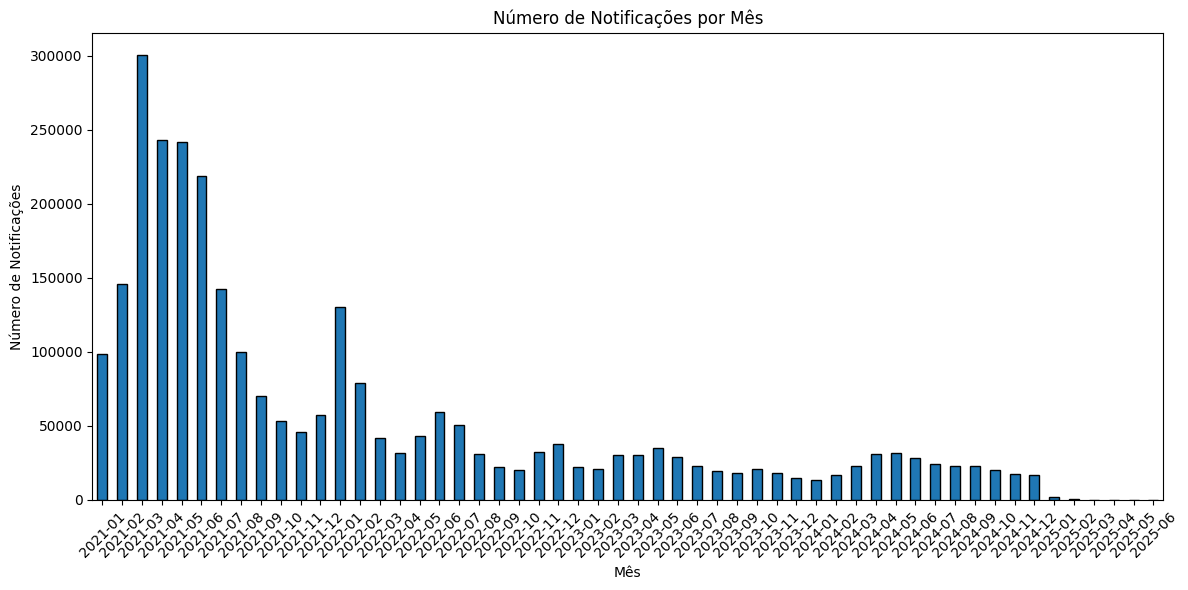

In [63]:
# Distribuição do número de notificações por mês
cleaned_df['month'] = cleaned_df['DT_NOTIFIC'].dt.to_period('M')
monthly_counts = cleaned_df['month'].value_counts().sort_index()

# Plotando a distribuição de notificações por mês
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', edgecolor='black')
plt.title('Número de Notificações por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Notificações')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

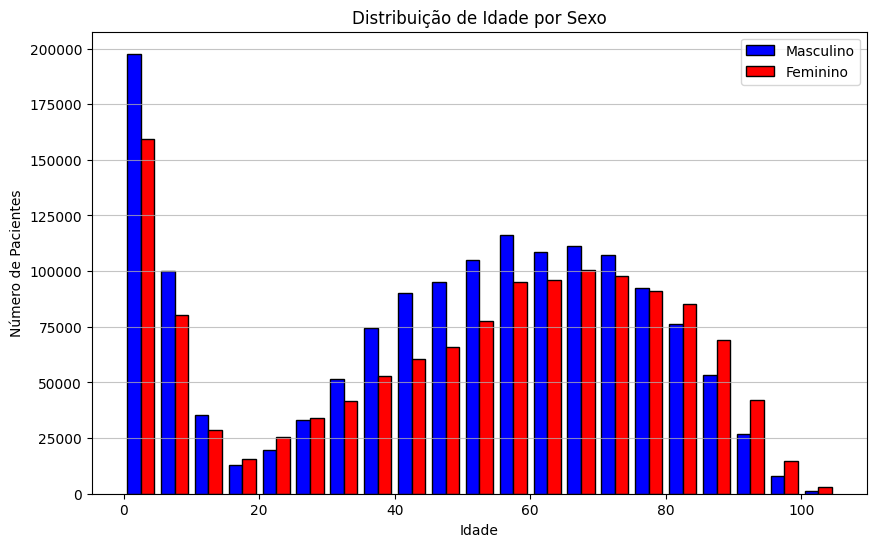

In [64]:
men = cleaned_df[cleaned_df['CS_SEXO'] == 'M']['NU_IDADE_N'].dropna()
women = cleaned_df[cleaned_df['CS_SEXO'] == 'F']['NU_IDADE_N'].dropna()

bins = range(0, 110, 5)  # Faixas de 5 em 5 anos

plt.figure(figsize=(10, 6))
plt.hist([men, women],
         bins=bins,
         label=['Masculino', 'Feminino'],
         color=['blue', 'red'],
         edgecolor='black',
         density=False,
         align='mid')
plt.title('Distribuição de Idade por Sexo')
plt.xlabel('Idade')
plt.ylabel('Número de Pacientes')
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.show()

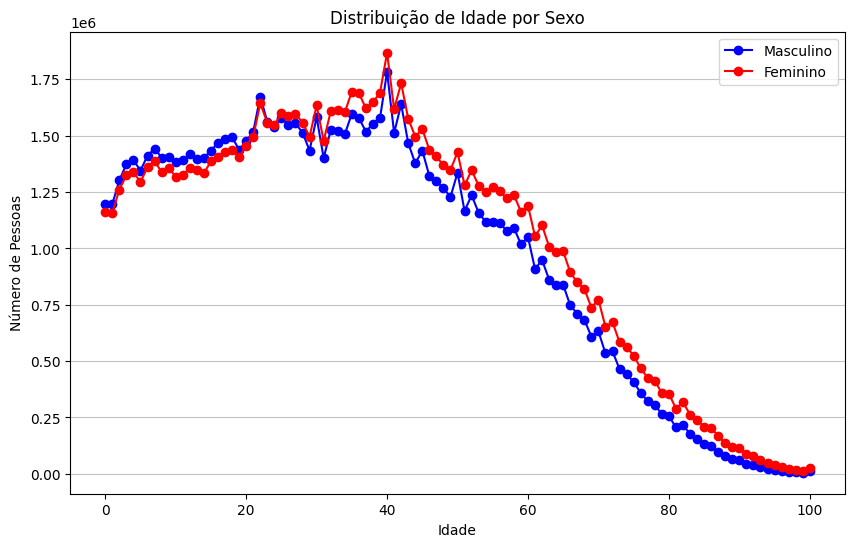

In [65]:
# Comparando a distribuição de idade das notificações com a idade populacional
# Os dados populacionais forma obtidos do IBGE (https://sidra.ibge.gov.br/tabela/9606)
# A url com os parâmetros de query é esta: https://sidra.ibge.gov.br/tabela/9606#/n1/all/v/allxp/p/last%201/c86/95251/c2/all/c287/6557,6558,6559,6560,6561,6562,6563,6564,6565,6566,6567,6568,6569,6570,6571,6572,6573,6574,6575,6576,6577,6578,6579,6580,6581,6582,6583,6584,6585,6586,6587,6588,6589,6590,6591,6592,6593,6594,6595,6596,6597,6598,6599,6600,6601,6602,6603,6604,6605,6606,6607,6608,6609,6610,6611,6612,6613,6614,6615,6616,6617,6618,6619,6620,6621,6622,6623,6624,6625,6626,6627,6628,6629,6630,6631,6632,6633,6634,6635,6636,6637,6638,6639,6640,6641,6642,6643,6644,6645,6646,6647,6648,6649,6650,6651,6652,6653,6656,6657,6658,6659,100362/l/v,p+c86+c2,t+c287/resultado

populacao_df = pd.read_csv('dados/populacao_sexo_tabela9606.csv')
populacao_df

plt.figure(figsize=(10, 6))
plt.plot(populacao_df['Idade'], populacao_df['Homens'], label='Masculino', color='blue', marker='o')
plt.plot(populacao_df['Idade'], populacao_df['Mulheres'], label='Feminino', color='red', marker='o')
plt.title('Distribuição de Idade por Sexo')
plt.xlabel('Idade')
plt.ylabel('Número de Pessoas')
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.show()

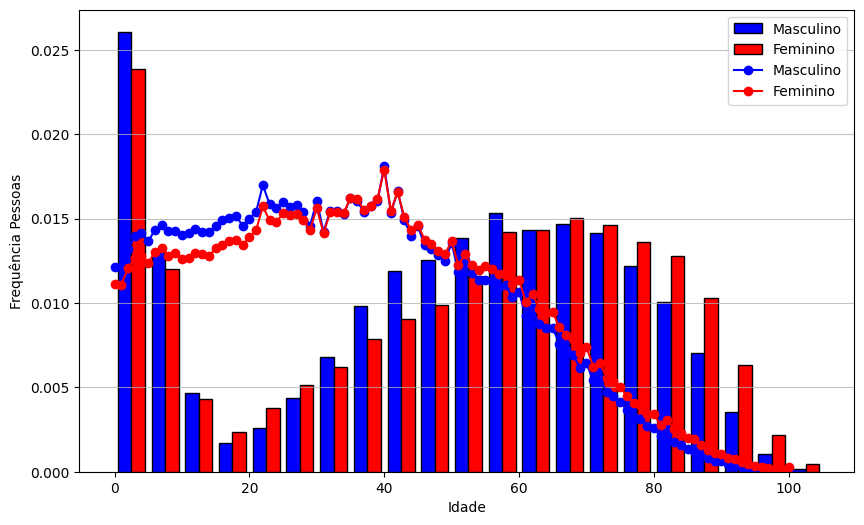

In [66]:
# Comparando a distribuição de idade das notificações com a idade populacional

bins = range(0, 110, 5)  # Faixas de 5 em 5 anos
plt.figure(figsize=(10, 6))
plt.hist([men, women],
         bins=bins,
         label=['Masculino', 'Feminino'],
         color=['blue', 'red'],
         edgecolor='black',
         density=True,
         align='mid')
plt.plot(populacao_df['Idade'], (populacao_df['Homens'] / populacao_df['Homens'].sum()), label='Masculino', color='blue', marker='o')
plt.plot(populacao_df['Idade'], (populacao_df['Mulheres'] / populacao_df['Mulheres'].sum()), label='Feminino', color='red', marker='o')
plt.xlabel('Idade')
plt.ylabel('Frequência Pessoas')
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.show()

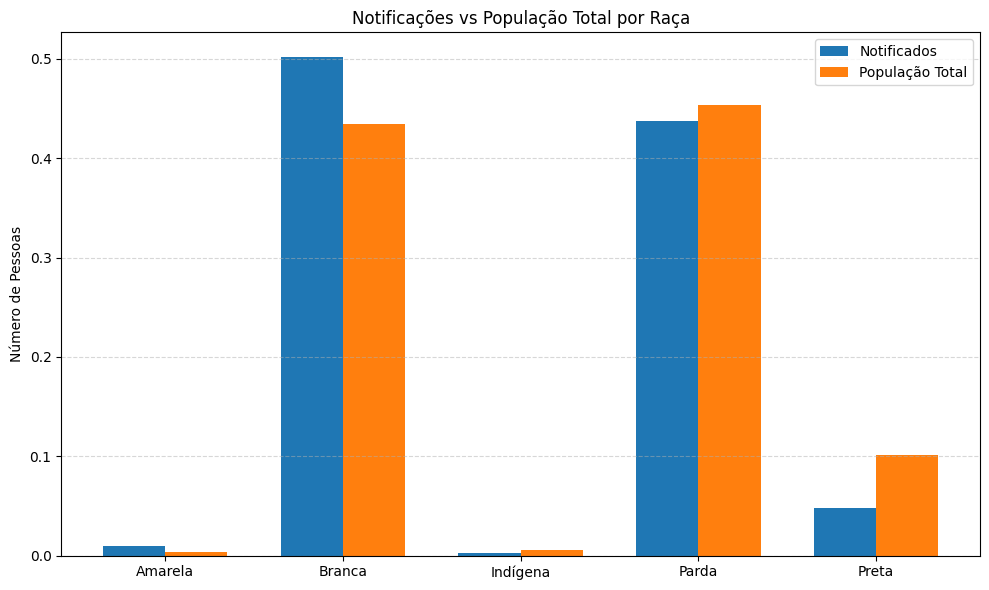

In [67]:
# Distribuição dos dados por raça (notificações)
num_pessoas_por_raca = cleaned_df['CS_RACA'].value_counts()
raca_equivalentes = {
    1: 'Branca',
    2: 'Preta',
    3: 'Amarela',
    4: 'Parda',
    5: 'Indígena',
    9: 'Ignorado'
}
num_pessoas_por_raca.index = num_pessoas_por_raca.index.map(raca_equivalentes)
num_pessoas_por_raca = num_pessoas_por_raca.drop('Ignorado')
num_pessoas_por_raca = num_pessoas_por_raca.sort_index()

# Dados populacionais de raça obtidos do IBGE
# https://sidra.ibge.gov.br/tabela/9606#/n1/all/v/allxp/p/last%201/c86/allxt/c2/6794/c287/100362/l/v,p+c86+c2,t+c287/resultado
populacao_raca_df = pd.read_csv('dados/populacao_raca_tabela9606.csv')
populacao_raca_df = populacao_raca_df.sort_values(by='Raca')

# Garantir que ambas as listas estejam na mesma ordem
racas = ['Amarela', 'Branca', 'Indígena', 'Parda', 'Preta']
notificados = num_pessoas_por_raca.reindex(racas)
populacao_total = populacao_raca_df.set_index('Raca').loc[racas, 'Total']

# Plotando o gráfico de barras lado a lado
x = range(len(racas))
largura = 0.35

plt.figure(figsize=(10, 6))
plt.bar([i - largura/2 for i in x], notificados / notificados.sum(), width=largura, label='Notificados')
plt.bar([i + largura/2 for i in x], populacao_total / populacao_total.sum(), width=largura, label='População Total')
plt.xticks(ticks=x, labels=racas)
plt.ylabel('Número de Pessoas')
plt.title('Notificações vs População Total por Raça')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

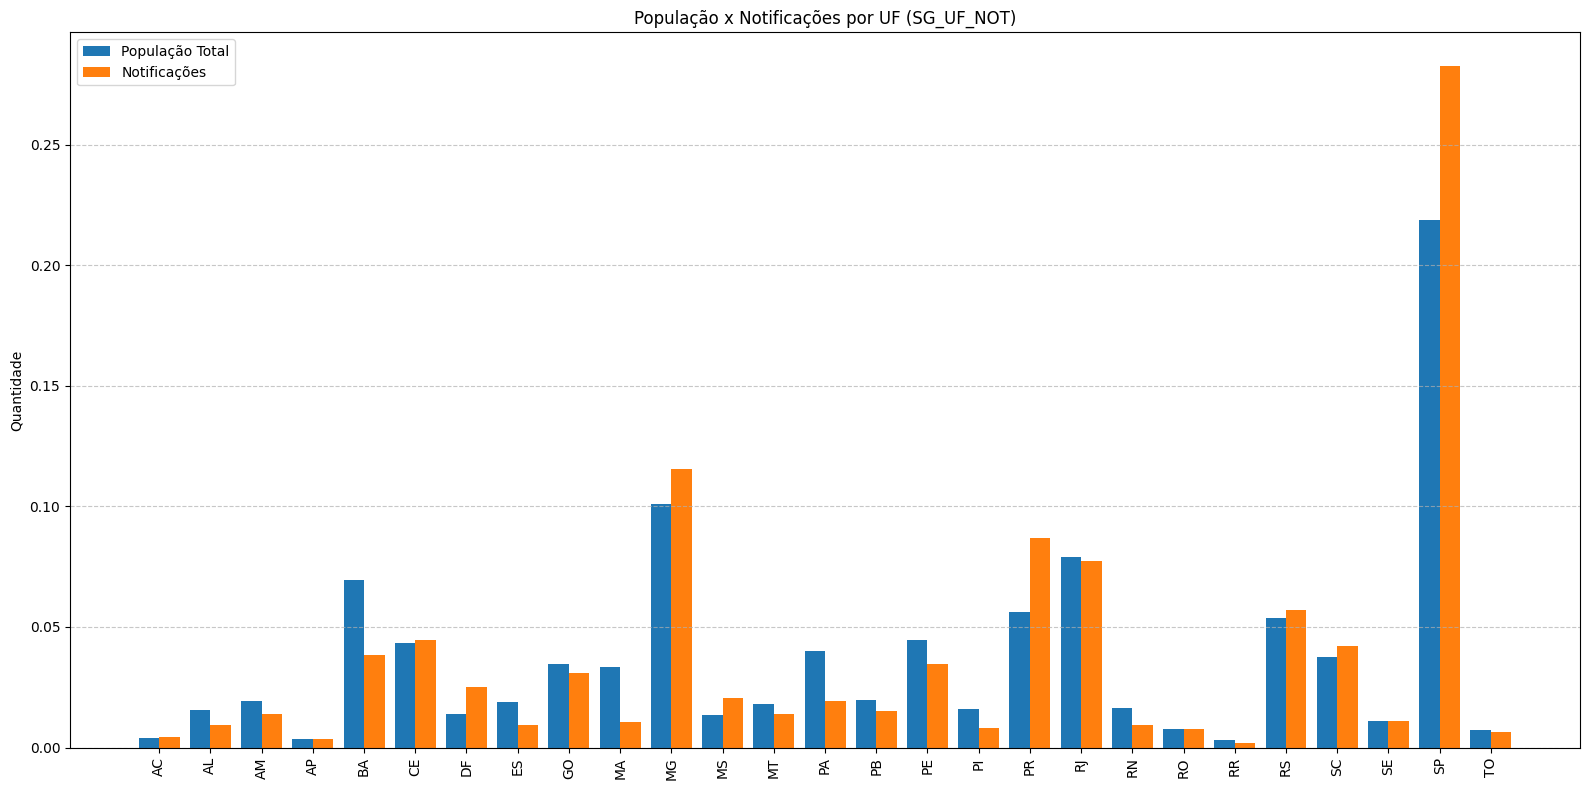

In [68]:
# Distribuição dos dados por UF/Região usando o estado da notificação
uf_df = cleaned_df['SG_UF_NOT'].value_counts().sort_index().copy()

# Dados populacionais obtidos do IBGE
# https://sidra.ibge.gov.br/tabela/9606#/n3/all/v/allxp/p/last%201/c86/95251/c2/6794/c287/100362/l/,t+p+c86+c2,c287+v/resultado
populacao_uf_df = pd.read_csv('dados/populacao_ufs_tabela9606.csv', header=None)
populacao_uf_df = populacao_uf_df.T
populacao_uf_df.columns = ['UF', 'Total']
populacao_uf_df = populacao_uf_df.drop(index=0)

# Mapeamento de nomes por extenso para siglas
nome_para_sigla = {
    'Rondônia': 'RO', 'Acre': 'AC', 'Amazonas': 'AM', 'Roraima': 'RR',
    'Pará': 'PA', 'Amapá': 'AP', 'Tocantins': 'TO', 'Maranhão': 'MA',
    'Piauí': 'PI', 'Ceará': 'CE', 'Rio Grande do Norte': 'RN', 'Paraíba': 'PB',
    'Pernambuco': 'PE', 'Alagoas': 'AL', 'Sergipe': 'SE', 'Bahia': 'BA',
    'Minas Gerais': 'MG', 'Espírito Santo': 'ES', 'Rio de Janeiro': 'RJ',
    'São Paulo': 'SP', 'Paraná': 'PR', 'Santa Catarina': 'SC', 'Rio Grande do Sul': 'RS',
    'Mato Grosso do Sul': 'MS', 'Mato Grosso': 'MT', 'Goiás': 'GO', 'Distrito Federal': 'DF'
}

# Remover possíveis espaços em branco
populacao_uf_df['UF'] = populacao_uf_df['UF'].str.strip()

# Adiciona a coluna com sigla
populacao_uf_df['UF_sigla'] = populacao_uf_df['UF'].map(nome_para_sigla)

# Converte a coluna 'Total' para inteiro
populacao_uf_df['Total'] = populacao_uf_df['Total'].astype(int)

# Transformar a Series de notificações em DataFrame
notificacoes_df = uf_df.reset_index()
notificacoes_df.columns = ['UF_sigla', 'Notificações']

# Merge: população + notificações
merged_df = pd.merge(populacao_uf_df, notificacoes_df, on='UF_sigla')

# Ordena por UF_sigla para manter coerência visual
merged_df = merged_df.sort_values('UF_sigla')

# Plot
x = np.arange(len(merged_df))
largura = 0.4

plt.figure(figsize=(16, 8))
plt.bar(x - largura/2, merged_df['Total'] / merged_df['Total'].sum(), width=largura, label='População Total')
plt.bar(x + largura/2, merged_df['Notificações'] / merged_df['Notificações'].sum(), width=largura, label='Notificações')

plt.xticks(x, merged_df['UF_sigla'], rotation=90)
plt.ylabel('Quantidade')
plt.title('População x Notificações por UF (SG_UF_NOT)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Casos relatados

In [69]:
# descricao - Campos de identificação do momento da notificação e características do paciente.
# Para descrição do lugar será considerado a UF de residência e de notificação apenas.
# Sobre o paciente, não será considerada a etnia se for indígena.
descricao = ["DT_NOTIFIC", "DT_SIN_PRI", "SG_UF_NOT", "CS_SEXO", "NU_IDADE_N", "CS_GESTANT",
             "CS_RACA", "CS_ESCOL_N", "PAC_COCBO", "PAC_DSCBO", "SG_UF", "CS_ZONA", "NOSOCOMIAL", "AVE_SUINO"]

# sintomas - Sintomas relatados pelo paciente.
sintomas = ["FEBRE", "TOSSE", "GARGANTA", "DISPNEIA", "DESC_RESP", "SATURACAO", "DIARREIA", "VOMITO",
            "DOR_ABD", "FADIGA", "PERD_OLFT", "PERD_PALA"]

# fatores_risco - Fatores de risco do paciente.
fatores_risco = ["FATOR_RISC", "PUERPERA", "CARDIOPATI", "HEMATOLOGI", "SIND_DOWN", "HEPATICA", "ASMA", "DIABETES",
                 "NEUROLOGIC", "PNEUMOPATI", "IMUNODEPRE", "RENAL", "OBESIDADE", "OBES_IMC", "TABAG"]

# vacinas - Informações sobre vacinas de covid recebidas pelo paciente. Não será analisado o lote da vacina.
vacinacao_covid = ["VACINA_COV", "DOSE_1_COV", "DOSE_2_COV", "DOSE_REF", "DOSE_2REF"]

# fabricante_vacinas_covid - Informações sobre o fabricante da vacina de covid recebida pelo paciente. Não será usado na análise.
# fabricante_vacinas_covid = ["FAB_COV_1", "FAB_COV_2", "FAB_COVRF", "FAB_COVRF2"]

# A análise irá se restringir a adultos.
# Não será analisado o efeito da vacinação em crianças de 6 meses a 8 anos nem a influência da vacinação em gestantes e da amamentação.
vacinacao_gripe = ["VACINA", "DT_UT_DOSE"]

# tratamento - Informações sobre tratamento do paciente.
tratamento = ["ANTIVIRAL", "TP_ANTIVIR", "DT_ANTIVIR", "TRAT_COV", "TIPO_TRAT", "DT_TRT_COV"]

# internacao - Informações sobre internação do paciente. Não será observado o município de internação, apenas a UF.
internacao = ["DT_INTERNA", "SG_UF_INTE", "UTI", "DT_ENTUTI", "DT_SAIDUTI", "SUPORT_VEN"]

# exames - Informações sobre exames realizados pelo paciente.
# Como o resultado do RAIOX é textual, será analisado apenas se foi realizado. O mesmo é feito para outros exames.
exames = ["RAIOX_RES", "DT_RAIOX", "TOMO_RES", "DT_TOMO", "AMOSTRA", "DT_COLETA", "TP_AMOSTRA", "TP_TES_AN", "DT_RES_AN", "RES_AN",
          "POS_AN_FLU", "TP_FLU_AN", "POS_AN_OUT", "AN_SARS2", "AN_VSR", "AN_PARA1", "AN_PARA2", "AN_PARA3", "AN_ADENO", "AN_OUTRO",
          "PCR_RESUL", "DT_PCR", "POS_PCRFLU", "TP_FLU_PCR", "PCR_FLUASU", "PCR_FLUBLI", "POS_PCROUT", "PCR_VSR", "PCR_PARA1", "PCR_PARA2",
          "PCR_PARA3", "PCR_PARA4", "PCR_ADENO", "PCR_METAP", "PCR_BOCA", "PCR_RINO", "PCR_OUTRO", "TP_AM_SOR", "DT_CO_SOR",
          "TP_SOR", "RES_IGG", "RES_IGM", "RES_IGA", "DT_RES"]

# classificacao - Informações sobre a classificação do caso.
classificacao = ["CLASSI_FIN", "CRITERIO", "EVOLUCAO", "DT_EVOLUCA", "DT_ENCERRA"]

## Predição da Classificação Final baseado nos sintomas

In [70]:
cluster_df = read_selected_columns([*sintomas, "CLASSI_FIN"])
print(cluster_df['CLASSI_FIN'].value_counts())
print(f"Num NaN: {cluster_df['CLASSI_FIN'].isnull().sum()}")
cluster_df

Lendo arquivo: INFLUD21-26-06-2025.csv
Lendo arquivo: INFLUD22-26-06-2025.csv
Lendo arquivo: INFLUD23-26-06-2025.csv
Lendo arquivo: INFLUD24-26-06-2025.csv
CLASSI_FIN
5.0    1546687
4.0     939095
2.0     168029
1.0      65901
3.0      17463
Name: count, dtype: int64
Num NaN: 116511


,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,CLASSI_FIN,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,4.0,NaN,NaN,NaN,NaN
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN
4,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2853682,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN
2853683,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN
2853684,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN


In [71]:
# Excluindo os casos sem classificação final
cluster_df = cluster_df.drop(cluster_df[cluster_df['CLASSI_FIN'].isnull()].index)

# Assumindo que sintomas ignorados (NaN ou 9.0) são considerados como não tendo o sintoma
cluster_df = cluster_df.fillna(2.0)
cluster_df = cluster_df.replace(9.0, 2.0)
cluster_df

,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,CLASSI_FIN,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,4.0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,2.0,2.0,2.0,2.0
4,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853679,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0
2853682,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0
2853683,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0
2853684,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0


In [72]:
resultados = []

for sintoma in sintomas:
    # Tabela de contingência entre presença do sintoma e a classificação final
    tabela = pd.crosstab(cluster_df[sintoma], cluster_df['CLASSI_FIN'])
    print(tabela)
    
    # Teste do qui-quadrado
    chi2, p, dof, expected = chi2_contingency(tabela)
    
    resultados.append({
        'sintoma': sintoma,
        'p_valor': p,
        'qui_quadrado': chi2,
        'dof': dof,
    })

# Exibir resultados ordenados pelo menor p-valor
resultado_df = pd.DataFrame(resultados).sort_values(by='p_valor')
resultado_df

CLASSI_FIN    1.0     2.0   3.0     4.0     5.0
FEBRE                                          
1.0         44753  109751  8689  463755  822468
2.0         21148   58278  8774  475340  724219
CLASSI_FIN    1.0     2.0    3.0     4.0      5.0
TOSSE                                            
1.0         52158  145313  11264  632904  1048220
2.0         13743   22716   6199  306191   498467
CLASSI_FIN    1.0     2.0    3.0     4.0      5.0
GARGANTA                                         
1.0         11478   12863   1476  107392   265293
2.0         54423  155166  15987  831703  1281394
CLASSI_FIN    1.0     2.0    3.0     4.0      5.0
DISPNEIA                                         
1.0         36889  111760  11316  605869  1064082
2.0         29012   56269   6147  333226   482605
CLASSI_FIN    1.0     2.0   3.0     4.0     5.0
DESC_RESP                                      
1.0         33257  118833  9969  517616  841595
2.0         32644   49196  7494  421479  705092
CLASSI_FIN    1.

,sintoma,p_valor,qui_quadrado,dof
0,FEBRE,0.0,21133.588893,4
1,TOSSE,0.0,29583.732989,4
2,GARGANTA,0.0,23121.296610,4
3,DISPNEIA,0.0,8513.408478,4
4,DESC_RESP,0.0,17252.835577,4
5,SATURACAO,0.0,26956.959745,4
6,DIARREIA,0.0,10619.991963,4
7,VOMITO,0.0,7734.904745,4
8,DOR_ABD,0.0,1538.730079,4
9,FADIGA,0.0,37434.850372,4


O Teste Estatístico de Qui-Quadrado mostrou que todos os sintomas relatados tem influência estatística sobre a classificação final.

In [73]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(cluster_df[sintomas])

d:\Estudo\IA na Saúde\Trabalho1\srag\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


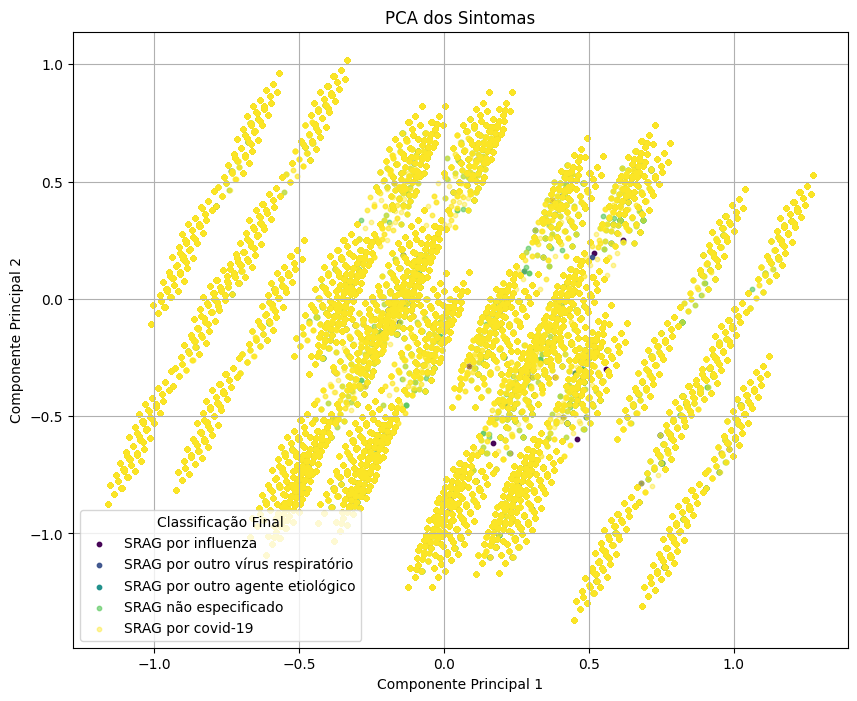

In [74]:
class_count = cluster_df['CLASSI_FIN'].value_counts()
total = class_count.sum()

# Mapeamento da classificação
class_map = {
    1: 'SRAG por influenza',
    2: 'SRAG por outro vírus respiratório',
    3: 'SRAG por outro agente etiológico',
    4: 'SRAG não especificado',
    5: 'SRAG por covid-19'
}

# Cores para cada classe
colors = plt.cm.viridis(np.linspace(0, 1, len(class_map)))
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

plt.figure(figsize=(10, 8))

for i, (class_code, label) in enumerate(class_map.items()):
    mask = cluster_df['CLASSI_FIN'] == class_code
    plt.scatter(
        pca_result[mask, 0], 
        pca_result[mask, 1], 
        label=label, 
        alpha=(1 -class_count[class_code] / total),
        s=10,
        color=colors[i]
    )

plt.title('PCA dos Sintomas')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Classificação Final')
plt.grid()
plt.show()

Apesar dos sintomas serem estatisticamente relevantes, a clusterização com PCA usando apenas eles como dados não revelou informações úteis. A covid que tem mais casos tomou todo o gráfico e as outras classificações ficaram espalhadas sem padrão visível.

Este resultado é um indício de que as classificações no espaço de sintomas não são linearmente separáveis.

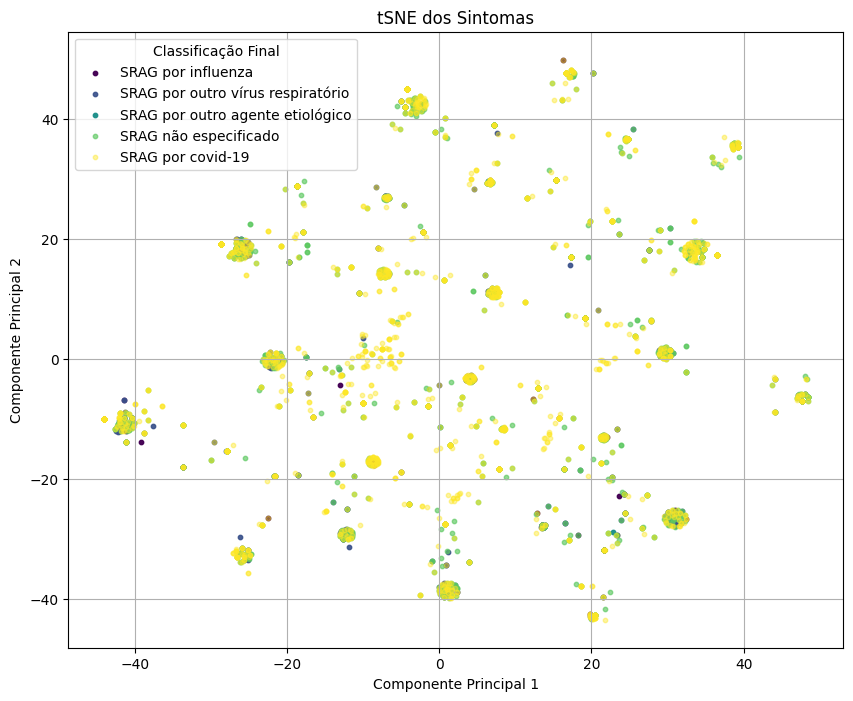

In [75]:
amostra_df = cluster_df.sample(frac=0.001, random_state=random_state)

tsne = TSNE(n_components=2, random_state=random_state)
tsne_result = tsne.fit_transform(amostra_df[sintomas])

class_count = amostra_df['CLASSI_FIN'].value_counts()
total = class_count.sum()

# Mapeamento da classificação
class_map = {
    1: 'SRAG por influenza',
    2: 'SRAG por outro vírus respiratório',
    3: 'SRAG por outro agente etiológico',
    4: 'SRAG não especificado',
    5: 'SRAG por covid-19'
}

# Cores para cada classe
colors = plt.cm.viridis(np.linspace(0, 1, len(class_map)))
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

plt.figure(figsize=(10, 8))

for i, (class_code, label) in enumerate(class_map.items()):
    mask = amostra_df['CLASSI_FIN'] == class_code
    plt.scatter(
        tsne_result[mask, 0], 
        tsne_result[mask, 1], 
        label=label, 
        alpha=(1 -class_count[class_code] / total),
        s=10,
        color=colors[i]
    )

plt.title('tSNE dos Sintomas')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Classificação Final')
plt.grid()
plt.show()

In [76]:
def sample_and_split_dataset(df, y_col, frac=0.001, random_state=random_state):
    amostra_df = df.sample(frac=frac, random_state=random_state)
    X_trainval, X_test, y_trainval, y_test = train_test_split(
        amostra_df[sintomas], amostra_df[y_col], test_size=0.3, random_state=random_state, stratify=amostra_df[y_col]
    )
    return X_trainval, X_test, y_trainval, y_test

def train_and_evaluate(model, name, X_trainval, y_trainval, X_test, y_test):
    scores = cross_val_score(model, X_trainval, y_trainval, cv=10, scoring='accuracy')
    
    for i, score in enumerate(scores):
        print(f"[{name}] Acurácia fold {i+1}: {score:.4f}")
    print(f"[{name}] Acurácia final: {np.mean(scores):.4f} ± {np.std(scores):.4f}")
    
    model.fit(X_trainval, y_trainval)
    y_pred = model.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred)
    print(f"[{name}] Acurácia no conjunto de teste: {acc_test:.4f}\n")
    
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    plt.title(f"Matriz de Confusão - Dados de Teste ({name})")
    plt.show()

[KNN] Acurácia fold 1: 0.4479
[KNN] Acurácia fold 2: 0.5260
[KNN] Acurácia fold 3: 0.4896
[KNN] Acurácia fold 4: 0.5365
[KNN] Acurácia fold 5: 0.5156
[KNN] Acurácia fold 6: 0.5183
[KNN] Acurácia fold 7: 0.4817
[KNN] Acurácia fold 8: 0.4398
[KNN] Acurácia fold 9: 0.5026
[KNN] Acurácia fold 10: 0.5236
[KNN] Acurácia final: 0.4982 ± 0.0315
[KNN] Acurácia no conjunto de teste: 0.4915



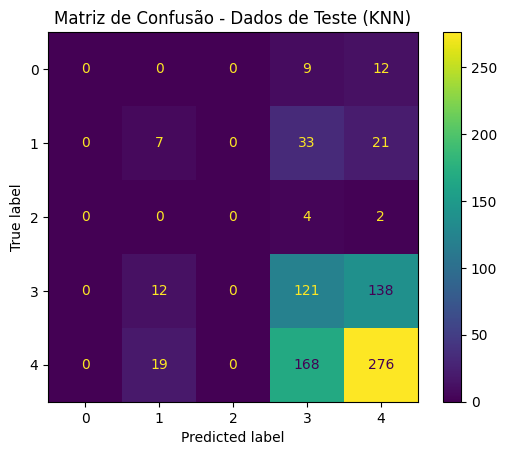

[Árvore] Acurácia fold 1: 0.5260
[Árvore] Acurácia fold 2: 0.4688
[Árvore] Acurácia fold 3: 0.5677
[Árvore] Acurácia fold 4: 0.5625
[Árvore] Acurácia fold 5: 0.5260
[Árvore] Acurácia fold 6: 0.5393
[Árvore] Acurácia fold 7: 0.5340
[Árvore] Acurácia fold 8: 0.4398
[Árvore] Acurácia fold 9: 0.5445
[Árvore] Acurácia fold 10: 0.5550
[Árvore] Acurácia final: 0.5264 ± 0.0390
[Árvore] Acurácia no conjunto de teste: 0.5341



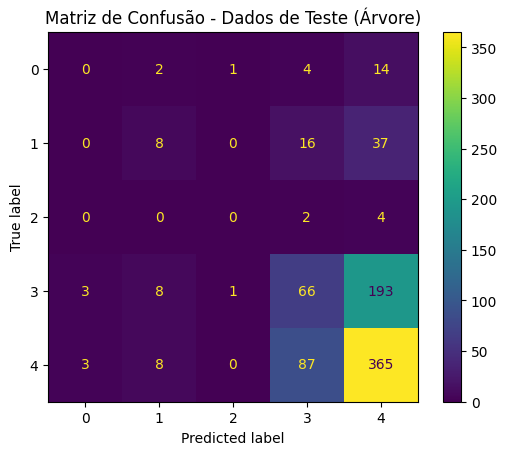

[SVM] Acurácia fold 1: 0.5990
[SVM] Acurácia fold 2: 0.5677
[SVM] Acurácia fold 3: 0.5781
[SVM] Acurácia fold 4: 0.5781
[SVM] Acurácia fold 5: 0.5625
[SVM] Acurácia fold 6: 0.5707
[SVM] Acurácia fold 7: 0.5707
[SVM] Acurácia fold 8: 0.5393
[SVM] Acurácia fold 9: 0.5654
[SVM] Acurácia fold 10: 0.5340
[SVM] Acurácia final: 0.5666 ± 0.0178
[SVM] Acurácia no conjunto de teste: 0.5730



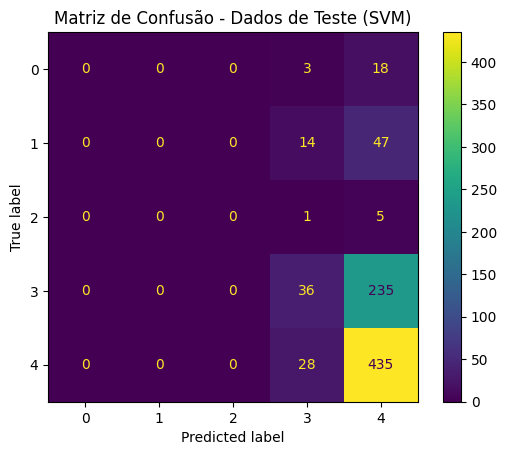

[Naive Bayes] Acurácia fold 1: 0.0938
[Naive Bayes] Acurácia fold 2: 0.0625
[Naive Bayes] Acurácia fold 3: 0.0521
[Naive Bayes] Acurácia fold 4: 0.0521
[Naive Bayes] Acurácia fold 5: 0.1042
[Naive Bayes] Acurácia fold 6: 0.0785
[Naive Bayes] Acurácia fold 7: 0.0785
[Naive Bayes] Acurácia fold 8: 0.0890
[Naive Bayes] Acurácia fold 9: 0.0681
[Naive Bayes] Acurácia fold 10: 0.0838
[Naive Bayes] Acurácia final: 0.0762 ± 0.0166
[Naive Bayes] Acurácia no conjunto de teste: 0.0900



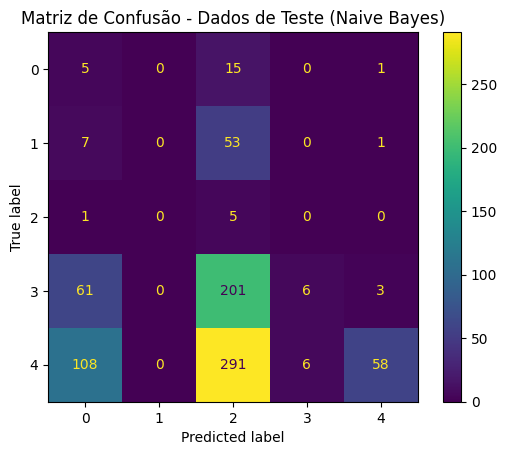

In [77]:
X_trainval, X_test, y_trainval, y_test = sample_and_split_dataset(cluster_df, 'CLASSI_FIN')
train_and_evaluate(KNeighborsClassifier(n_neighbors=10), "KNN", X_trainval, y_trainval, X_test, y_test)
train_and_evaluate(DecisionTreeClassifier(random_state=random_state), "Árvore", X_trainval, y_trainval, X_test, y_test)
train_and_evaluate(LinearSVC(max_iter=10000, random_state=random_state), "SVM", X_trainval, y_trainval, X_test, y_test)
train_and_evaluate(GaussianNB(), "Naive Bayes", X_trainval, y_trainval, X_test, y_test)

# Classificação de gravidade

In [78]:
predict_evolucao_df = read_selected_columns(["CS_SEXO", "NU_IDADE_N", "CS_GESTANT", *sintomas, *fatores_risco, "EVOLUCAO"])
predict_evolucao_df

Lendo arquivo: INFLUD21-26-06-2025.csv
Lendo arquivo: INFLUD22-26-06-2025.csv
Lendo arquivo: INFLUD23-26-06-2025.csv
Lendo arquivo: INFLUD24-26-06-2025.csv


,CS_SEXO,NU_IDADE_N,CS_GESTANT,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,...,IMUNODEPRE,RENAL,OBESIDADE,OBES_IMC,TABAG,EVOLUCAO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
0,M,59,6,2.0,1.0,1.0,1.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,M,60,6,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,NaN,NaN,1.0,2.0,2.0,2.0,2.0
2,F,88,6,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0
3,F,26,5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,F,53,9,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853681,M,91,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2853682,M,55,6,1.0,1.0,NaN,1.0,1.0,1.0,NaN,...,2.0,2.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2853683,F,82,5,1.0,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2853684,F,40,5,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


In [79]:
predict_evolucao_df = predict_evolucao_df[predict_evolucao_df["CS_SEXO"].isin(['M', 'F'])]
predict_evolucao_df = predict_evolucao_df[~predict_evolucao_df["CS_GESTANT"].isin([0, 4.0, 9.0])]
predict_evolucao_df["CS_GESTANT"] = predict_evolucao_df["CS_GESTANT"].replace(5.0, 4.0)
predict_evolucao_df["CS_GESTANT"] = predict_evolucao_df["CS_GESTANT"].replace(6.0, 4.0)
predict_evolucao_df[sintomas + fatores_risco] = predict_evolucao_df[sintomas + fatores_risco].fillna(2.0)
predict_evolucao_df[sintomas + fatores_risco] = predict_evolucao_df[sintomas + fatores_risco].replace(9.0, 2.0)
predict_evolucao_df = predict_evolucao_df.drop(["OBES_IMC", "TABAG"], axis=1)
predict_evolucao_df["EVOLUCAO"] = predict_evolucao_df["EVOLUCAO"].replace(3.0, 2.0)
predict_evolucao_df = predict_evolucao_df[predict_evolucao_df["EVOLUCAO"] != 9.0]
predict_evolucao_df = predict_evolucao_df[~predict_evolucao_df["EVOLUCAO"].isna()]
predict_evolucao_df

,CS_SEXO,NU_IDADE_N,CS_GESTANT,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,...,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,EVOLUCAO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
0,M,59,4,2.0,1.0,1.0,1.0,1.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
1,M,60,4,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
2,F,88,4,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,F,26,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
5,M,4,4,1.0,1.0,2.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853679,M,83,4,2.0,1.0,2.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2853682,M,55,4,1.0,1.0,2.0,1.0,1.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2853683,F,82,4,1.0,1.0,2.0,2.0,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
2853684,F,40,4,2.0,2.0,2.0,2.0,1.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


[KNN (distância)] Acurácia fold 1: 0.6982
[KNN (distância)] Acurácia fold 2: 0.7385
[KNN (distância)] Acurácia fold 3: 0.7344
[KNN (distância)] Acurácia fold 4: 0.7293
[KNN (distância)] Acurácia fold 5: 0.7477
[KNN (distância)] Acurácia fold 6: 0.7396
[KNN (distância)] Acurácia fold 7: 0.7396
[KNN (distância)] Acurácia fold 8: 0.7316
[KNN (distância)] Acurácia fold 9: 0.7316
[KNN (distância)] Acurácia fold 10: 0.7303
[KNN (distância)] Acurácia final: 0.7321 ± 0.0125
[KNN (distância)] Acurácia no conjunto de teste: 0.7362



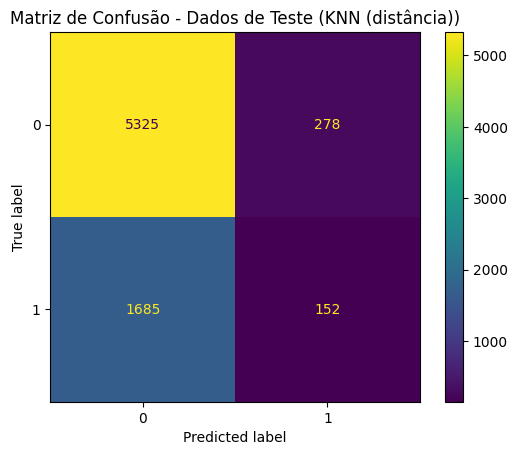

[Árvore de Decisão] Acurácia fold 1: 0.7477
[Árvore de Decisão] Acurácia fold 2: 0.7477
[Árvore de Decisão] Acurácia fold 3: 0.7460
[Árvore de Decisão] Acurácia fold 4: 0.7437
[Árvore de Decisão] Acurácia fold 5: 0.7540
[Árvore de Decisão] Acurácia fold 6: 0.7437
[Árvore de Decisão] Acurácia fold 7: 0.7529
[Árvore de Decisão] Acurácia fold 8: 0.7425
[Árvore de Decisão] Acurácia fold 9: 0.7442
[Árvore de Decisão] Acurácia fold 10: 0.7487
[Árvore de Decisão] Acurácia final: 0.7471 ± 0.0037
[Árvore de Decisão] Acurácia no conjunto de teste: 0.7464



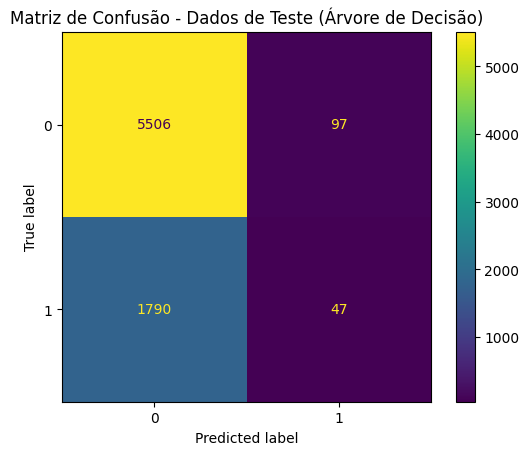

[SVM] Acurácia fold 1: 0.7535
[SVM] Acurácia fold 2: 0.7535
[SVM] Acurácia fold 3: 0.7535
[SVM] Acurácia fold 4: 0.7529
[SVM] Acurácia fold 5: 0.7529
[SVM] Acurácia fold 6: 0.7529
[SVM] Acurácia fold 7: 0.7529
[SVM] Acurácia fold 8: 0.7529
[SVM] Acurácia fold 9: 0.7529
[SVM] Acurácia fold 10: 0.7533
[SVM] Acurácia final: 0.7531 ± 0.0003
[SVM] Acurácia no conjunto de teste: 0.7531



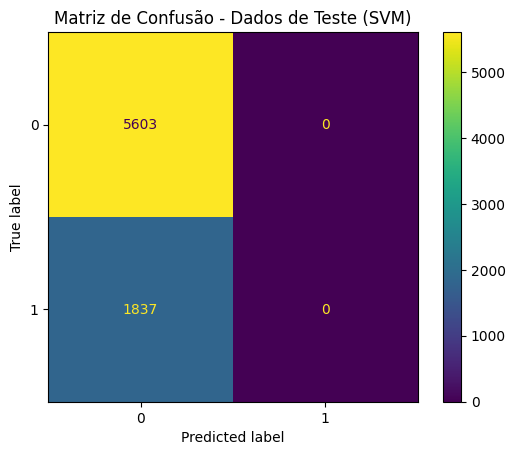

[Naive Bayes] Acurácia fold 1: 0.7425
[Naive Bayes] Acurácia fold 2: 0.7298
[Naive Bayes] Acurácia fold 3: 0.7224
[Naive Bayes] Acurácia fold 4: 0.7189
[Naive Bayes] Acurácia fold 5: 0.7103
[Naive Bayes] Acurácia fold 6: 0.7126
[Naive Bayes] Acurácia fold 7: 0.7172
[Naive Bayes] Acurácia fold 8: 0.7327
[Naive Bayes] Acurácia fold 9: 0.6895
[Naive Bayes] Acurácia fold 10: 0.7193
[Naive Bayes] Acurácia final: 0.7195 ± 0.0136
[Naive Bayes] Acurácia no conjunto de teste: 0.7254



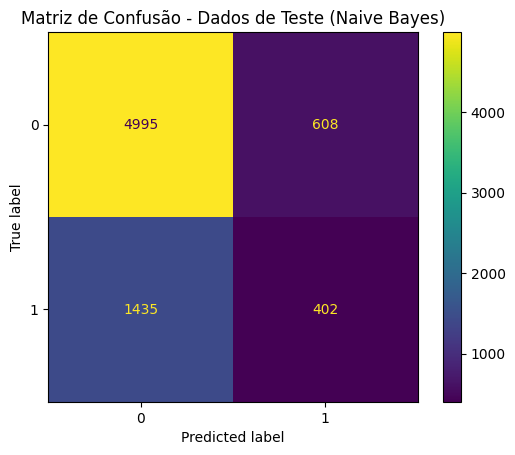

d:\Estudo\IA na Saúde\Trabalho1\srag\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Estudo\IA na Saúde\Trabalho1\srag\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Estudo\IA na Saúde\Trabalho1\srag\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Estudo\IA na Saúde\Trabalho1\srag\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\E

[MLP] Acurácia fold 1: 0.7535
[MLP] Acurácia fold 2: 0.7535
[MLP] Acurácia fold 3: 0.7535
[MLP] Acurácia fold 4: 0.7512
[MLP] Acurácia fold 5: 0.7529
[MLP] Acurácia fold 6: 0.7529
[MLP] Acurácia fold 7: 0.7529
[MLP] Acurácia fold 8: 0.7529
[MLP] Acurácia fold 9: 0.7529
[MLP] Acurácia fold 10: 0.7533
[MLP] Acurácia final: 0.7529 ± 0.0006
[MLP] Acurácia no conjunto de teste: 0.7531



d:\Estudo\IA na Saúde\Trabalho1\srag\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


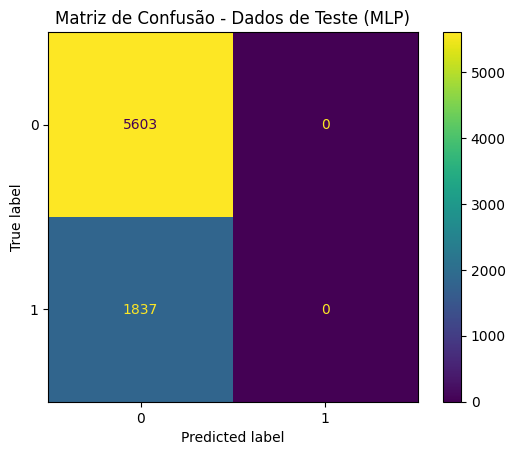

In [80]:
X_trainval, X_test, y_trainval, y_test = sample_and_split_dataset(predict_evolucao_df, "EVOLUCAO", frac=0.01)
train_and_evaluate(KNeighborsClassifier(n_neighbors=10, weights='distance'), "KNN (distância)", X_trainval, y_trainval, X_test, y_test)
train_and_evaluate(DecisionTreeClassifier(random_state=random_state), "Árvore de Decisão", X_trainval, y_trainval, X_test, y_test)
train_and_evaluate(LinearSVC(max_iter=10000, random_state=random_state), "SVM", X_trainval, y_trainval, X_test, y_test)
train_and_evaluate(GaussianNB(), "Naive Bayes", X_trainval, y_trainval, X_test, y_test)
train_and_evaluate(MLPClassifier(hidden_layer_sizes=(20, 10), random_state=random_state, max_iter=10), "MLP", X_trainval, y_trainval, X_test, y_test)

# Análise de tendência

In [81]:
tendencia_df = read_selected_columns(["CLASSI_FIN", "EVOLUCAO", "DT_NOTIFIC", "DT_SIN_PRI"])

Lendo arquivo: INFLUD21-26-06-2025.csv
Lendo arquivo: INFLUD22-26-06-2025.csv
Lendo arquivo: INFLUD23-26-06-2025.csv
Lendo arquivo: INFLUD24-26-06-2025.csv


In [82]:
tendencia_df = tendencia_df.dropna(subset=["CLASSI_FIN", "EVOLUCAO", "DT_NOTIFIC", "DT_SIN_PRI"])
tendencia_df["EVOLUCAO"] = tendencia_df["EVOLUCAO"].replace(3.0, 2.0)
tendencia_df = tendencia_df[tendencia_df["EVOLUCAO"] != 9.0]
tendencia_df["DT_NOTIFIC"] = pd.to_datetime(tendencia_df["DT_NOTIFIC"], errors="coerce")
tendencia_df["DT_SIN_PRI"] = pd.to_datetime(tendencia_df["DT_SIN_PRI"], errors="coerce")
tendencia_df["DIAS_NOTIFIC"] = (tendencia_df["DT_NOTIFIC"] - tendencia_df["DT_SIN_PRI"]).dt.days

<Figure size 1200x600 with 0 Axes>

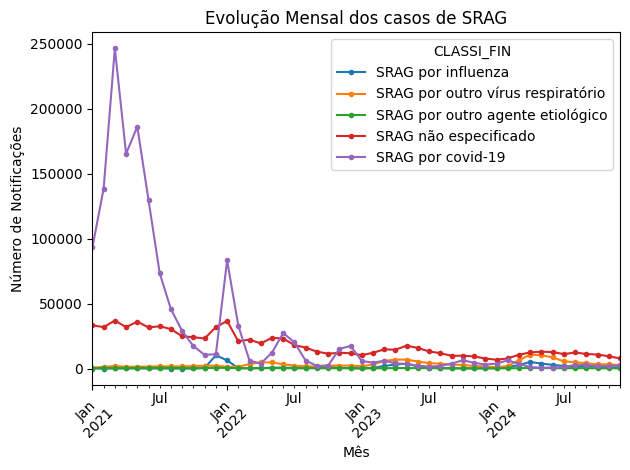

In [83]:
# Mapeamento das classificações
class_map = {
    1: 'SRAG por influenza',
    2: 'SRAG por outro vírus respiratório',
    3: 'SRAG por outro agente etiológico',
    4: 'SRAG não especificado',
    5: 'SRAG por covid-19'
}

# Adiciona coluna de mês
tendencia_df['month'] = tendencia_df['DT_SIN_PRI'].dt.to_period('M')

# Filtra por evolução
alta_df = tendencia_df[tendencia_df['EVOLUCAO'] == 1.0]
obito_df = tendencia_df[tendencia_df['EVOLUCAO'] == 2.0]

# Conta mensal por classificação
alta_monthly = alta_df.groupby(['month', 'CLASSI_FIN']).size().unstack(fill_value=0)
obito_monthly = obito_df.groupby(['month', 'CLASSI_FIN']).size().unstack(fill_value=0)

# Converte index para timestamp e renomeia colunas
alta_monthly.index = alta_monthly.index.to_timestamp()
obito_monthly.index = obito_monthly.index.to_timestamp()
alta_monthly = alta_monthly.rename(columns=class_map)
obito_monthly = obito_monthly.rename(columns=class_map)

plt.figure(figsize=(12, 6))
(alta_monthly + obito_monthly).plot(kind='line', marker='.')
plt.title('Evolução Mensal dos casos de SRAG')
plt.xlabel('Mês')
plt.ylabel('Número de Notificações')
plt.xticks(rotation=45)
plt.legend(title='CLASSI_FIN')
plt.tight_layout()
plt.show()

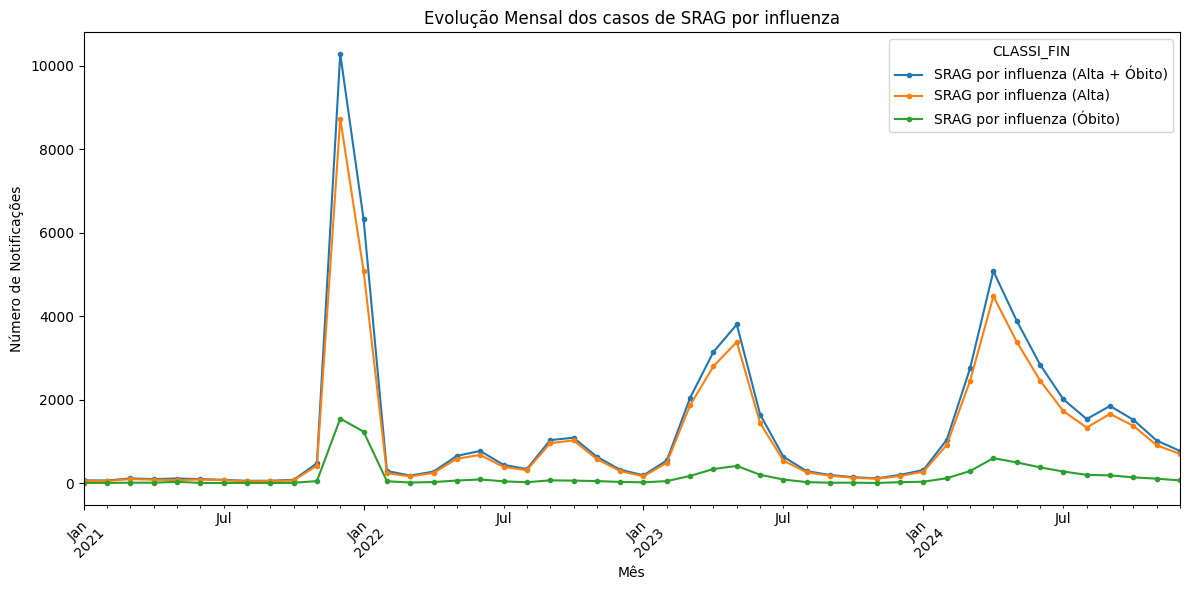

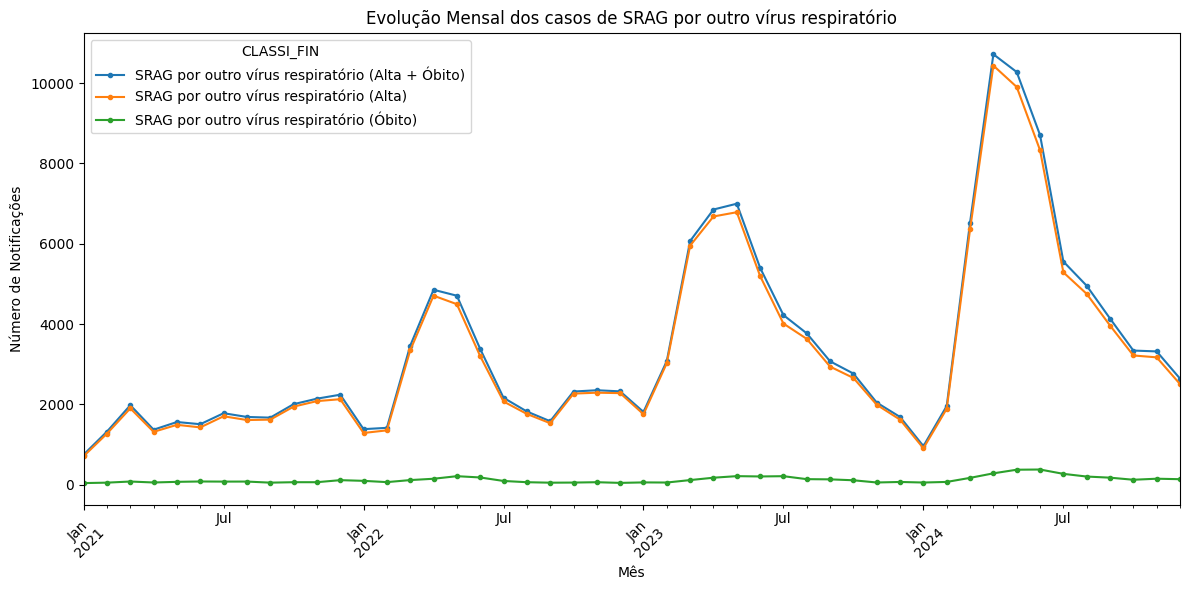

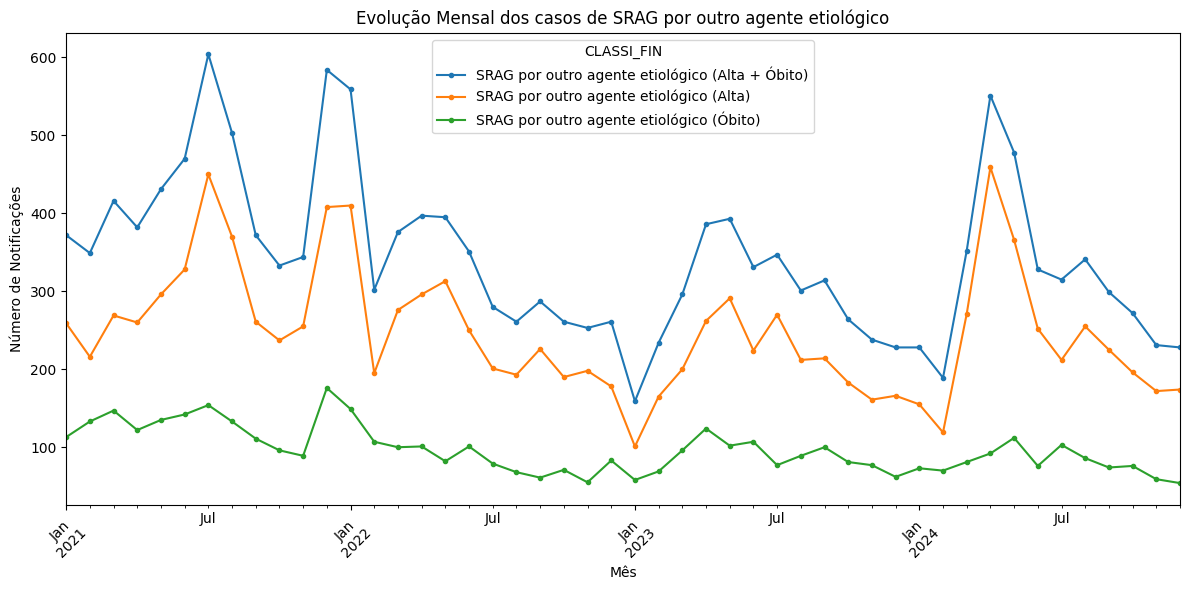

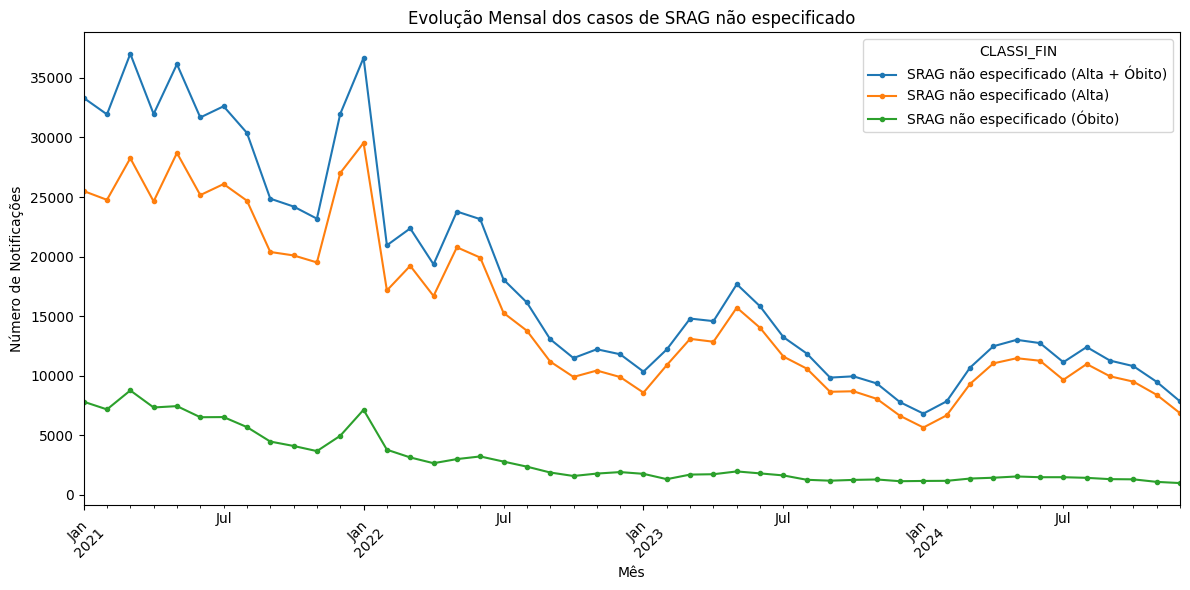

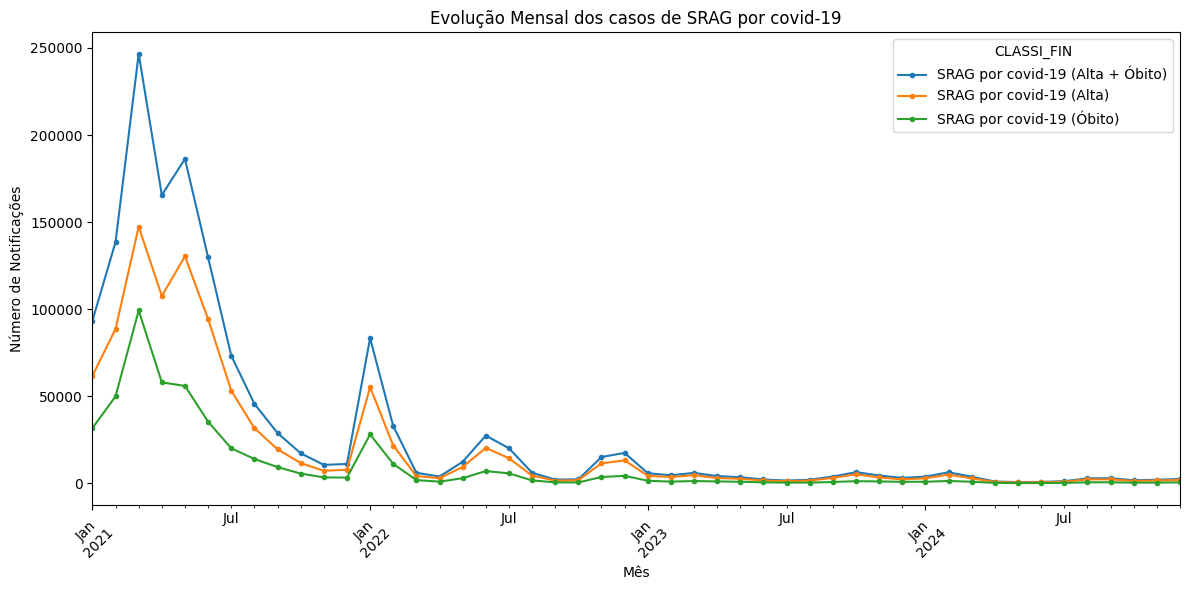

In [84]:
for col in alta_monthly.columns:
    plt.figure(figsize=(12, 6))
    (alta_monthly[col] + obito_monthly[col]).plot(kind='line', marker='.', label=f'{col} (Alta + Óbito)')
    alta_monthly[col].plot(kind='line', marker='.', label=f'{col} (Alta)')
    obito_monthly[col].plot(kind='line', marker='.', label=f'{col} (Óbito)')
    plt.title(f'Evolução Mensal dos casos de {col}')
    plt.xlabel('Mês')
    plt.ylabel('Número de Notificações')
    plt.xticks(rotation=45)
    plt.legend(title='CLASSI_FIN')
    plt.tight_layout()
    plt.show()

<Figure size 1200x600 with 0 Axes>

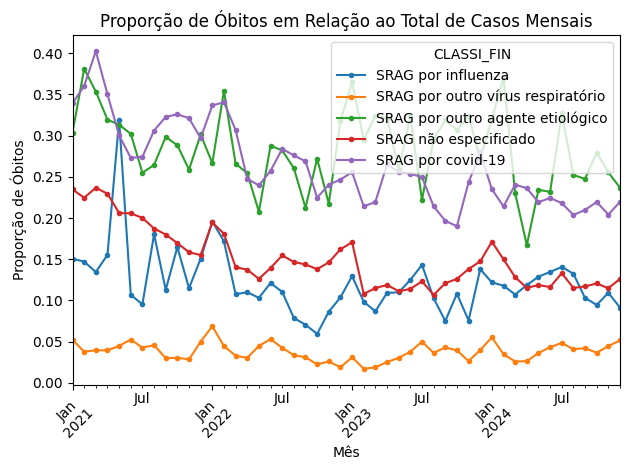

In [85]:
# Proporção de óbitos em relação ao total de casos
obito_proporcao = (obito_monthly / (alta_monthly + obito_monthly)).fillna(0)
plt.figure(figsize=(12, 6))
obito_proporcao.plot(kind='line', marker='.')
plt.title('Proporção de Óbitos em Relação ao Total de Casos Mensais')
plt.xlabel('Mês')
plt.ylabel('Proporção de Óbitos')
plt.xticks(rotation=45)
plt.legend(title='CLASSI_FIN')
plt.tight_layout()
plt.show()

## Utilizando um Regressor Linear para prever o número de casos nas próximas semanas

In [86]:
wanted_cols = ["DT_SIN_PRI","SEM_PRI","CLASSI_FIN"]

df = read_selected_columns(wanted_cols)

Lendo arquivo: INFLUD21-26-06-2025.csv
Lendo arquivo: INFLUD22-26-06-2025.csv
Lendo arquivo: INFLUD23-26-06-2025.csv
Lendo arquivo: INFLUD24-26-06-2025.csv


### Criando uma coluna temporal ano-semana epidemológica

In [87]:
df['DT_SIN_PRI'] = pd.to_datetime(df['DT_SIN_PRI'], errors='coerce', format='%Y-%m-%d')
df.dropna(subset=['DT_SIN_PRI'], inplace=True)
df['SEM_PRI_ANO'] = df['DT_SIN_PRI'].dt.year.astype(str) + '-' + df['SEM_PRI'].astype(str).str.zfill(2)

### Tratando valores nulos

In [ ]:
print("Numeros de valores nulos em cada coluna:")
print(df.isnull().sum())

df['CLASSI_FIN_TRATADA'] = df['CLASSI_FIN'].fillna(6) # VERIFICAR SE FAZ SENTIDO

Numeros de valores nulos em cada coluna:
DT_SIN_PRI          0
SEM_PRI             0
CLASSI_FIN     116511
SEM_PRI_ANO         0
dtype: int64


KeyError: 'EVOLUCAO'

### Criando o dataframe SEM_PRI_ANO x CLASSI_FIN_TRATADA

In [ ]:
contagem_classi_df = pd.crosstab(df['SEM_PRI_ANO'], df['CLASSI_FIN_TRATADA'])

contagem_classi_df = contagem_classi_df.rename(columns={
    1: 'SRAG por influenza',
    2: 'SRAG por outro vírus respiratório',
    3: 'SRAG por outro agente etiológico',
    4: 'SRAG não especificado',
    5: 'SRAG por covid-19',
    6: 'Não informado'
})

contagem_classi_df['total_casos'] = contagem_classi_df.sum(axis=1)

print(contagem_classi_df.head())

CLASSI_FIN_TRATADA  SRAG por influenza  SRAG por outro vírus respiratório  \
SEM_PRI_ANO                                                                 
2021-01                             34                                175   
2021-02                             18                                157   
2021-03                             17                                214   
2021-04                             16                                214   
2021-05                             14                                278   

CLASSI_FIN_TRATADA  SRAG por outro agente etiológico  SRAG não especificado  \
SEM_PRI_ANO                                                                   
2021-01                                          104                   9070   
2021-02                                          124                   9028   
2021-03                                          100                   8539   
2021-04                                           86             

### Criando colunas para fazer a previsão de séries temporais

Utilizaremos colunas de lag para capturar tendências dos casos das três semanas anteriores à da semana a ser predita. Além disso, iremos ter uma coluna representando uma janela móvel, que irá calcular a média do total de casos das últimas quatro semanas, agregando ainda mais informação para o modelo.

In [ ]:
df_modelo = contagem_classi_df.copy()

# Features de lag 
df_modelo['lag_1'] = df_modelo['total_casos'].shift(1) # Numero de casos de 1 semana atrás
df_modelo['lag_2'] = df_modelo['total_casos'].shift(2) # Numero de casos de 2 semanas atrás
df_modelo['lag_3'] = df_modelo['total_casos'].shift(3) # Numero de casos de 3 semanas atrás

# Features de Janela Móvel sobre o total de casos
df_modelo['media_movel_4s'] = df_modelo['total_casos'].shift(1).rolling(window=4).mean() # Média da quantidade de casos totais das últimas 4 semanas

# Semana do ano
df_modelo['semana_do_ano'] = df_modelo.index.str[5:].astype(int)

# Transformando a semana do ano em features cíclicas (semana 1 esta perto da semana 52)
df_modelo['semana_sin'] = np.sin(2 * np.pi * df_modelo['semana_do_ano']/52.0)
df_modelo['semana_cos'] = np.cos(2 * np.pi * df_modelo['semana_do_ano']/52.0)

df_modelo.dropna(inplace=True)
df_modelo.head(10)


CLASSI_FIN_TRATADA,SRAG por influenza,SRAG por outro vírus respiratório,SRAG por outro agente etiológico,SRAG não especificado,SRAG por covid-19,Não informado,total_casos,lag_1,lag_2,lag_3,media_movel_4s,semana_do_ano,semana_sin,semana_cos
SEM_PRI_ANO,,,,,,,,,,,,,,
2021-05,14,278,88,9022,26371,1042,36815,30483.0,32526.0,35341.0,33743.00,5,0.568065,8.229839e-01
2021-06,19,328,91,8499,29929,1203,40069,36815.0,30483.0,32526.0,33791.25,6,0.663123,7.485107e-01
2021-07,20,355,101,8874,39943,1474,50767,40069.0,36815.0,30483.0,34973.25,7,0.748511,6.631227e-01
2021-08,24,389,88,7936,44081,1740,54258,50767.0,40069.0,36815.0,39533.50,8,0.822984,5.680647e-01
2021-09,26,468,101,10006,63231,2733,76565,54258.0,50767.0,40069.0,45477.25,9,0.885456,4.647232e-01
2021-10,29,460,112,9585,64802,2622,77610,76565.0,54258.0,50767.0,55414.75,10,0.935016,3.546049e-01
2021-11,34,507,82,9821,64247,2772,77463,77610.0,76565.0,54258.0,64800.00,11,0.970942,2.393157e-01
2021-12,21,424,100,8200,51400,2264,62409,77463.0,77610.0,76565.0,71474.00,12,0.992709,1.205367e-01
2021-13,25,439,104,8296,48373,2518,59755,62409.0,77463.0,77610.0,73511.75,13,1.000000,-1.608123e-16


### Fazendo o treinamento com os dados de 2021, 2022 e 2023 e testando com os dados de 2024

In [ ]:
target_cols = ['SRAG por influenza','SRAG por outro vírus respiratório', 'SRAG por outro agente etiológico', 'SRAG não especificado', 'SRAG por covid-19', 'Não informado']

features_cols = ['lag_1','lag_2','lag_3','media_movel_4s','semana_sin','semana_cos']

# Utilizando os dados de 2021,2022 e 2023 para treinar
train_df = df_modelo[df_modelo.index.str.startswith(('2021','2022','2023'))]

# Utilizand os dados de 2024 para teste
test_df = df_modelo[df_modelo.index.str.startswith('2024')]

X_train = train_df[features_cols]
y_train = train_df[target_cols]

X_test = test_df[features_cols]
y_test = test_df[target_cols]

print(f"Semanas de treino: {len(X_train)}")
print(f"Semanas de teste: {len(X_test)}")
y_train.head()

Semanas de treino: 152
Semanas de teste: 52


CLASSI_FIN_TRATADA,SRAG por influenza,SRAG por outro vírus respiratório,SRAG por outro agente etiológico,SRAG não especificado,SRAG por covid-19,Não informado
SEM_PRI_ANO,,,,,,
2021-05,14,278,88,9022,26371,1042
2021-06,19,328,91,8499,29929,1203
2021-07,20,355,101,8874,39943,1474
2021-08,24,389,88,7936,44081,1740
2021-09,26,468,101,10006,63231,2733


### Utilizando o RandomForestRegression para prever várias colunas de uma vez juntamente com o GridSearchCV para otimização de hiperparâmetros

In [ ]:
parameters = {'n_estimators': [50,100,150,200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
model = RandomForestRegressor(random_state=random_state)

grid_search = GridSearchCV(model, parameters,cv=5, scoring='neg_mean_squared_error', n_jobs=1)
grid_search.fit(X_train, y_train)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [ ]:
y_pred = grid_search.predict(X_test)
y_pred_df = pd.DataFrame(y_pred, index=X_test.index, columns = target_cols)


# Calcular o erro para cada tipo de classificação
for col in target_cols:
    mae = mean_absolute_error(y_test[col], y_pred_df[col])
    print(f"MAE para '{col}': {mae:.2f}")


MAE para 'SRAG por influenza': 276.48
MAE para 'SRAG por outro vírus respiratório': 486.60
MAE para 'SRAG por outro agente etiológico': 12.59
MAE para 'SRAG não especificado': 500.82
MAE para 'SRAG por covid-19': 396.26
MAE para 'Não informado': 65.01


### Resultados das previsões dos casos por semana de 2024

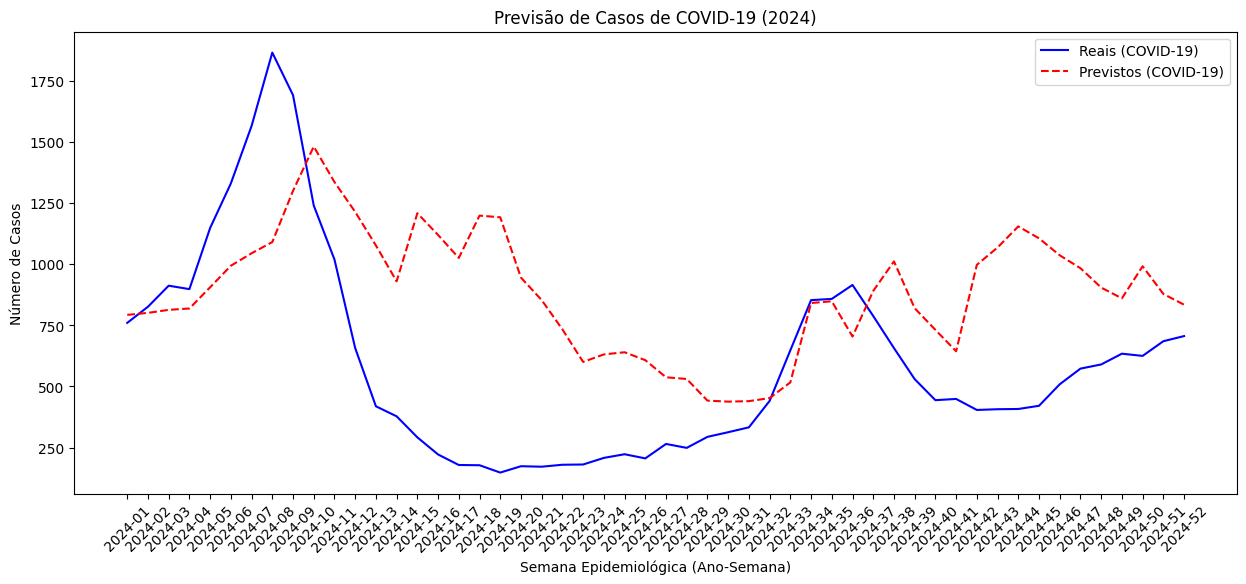

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(y_test.index, y_test['SRAG por covid-19'], label='Reais (COVID-19)', color='blue')
plt.plot(y_pred_df.index, y_pred_df['SRAG por covid-19'], label='Previstos (COVID-19)', color='red', linestyle='--')
plt.title('Previsão de Casos de COVID-19 (2024)')
plt.xlabel('Semana Epidemiológica (Ano-Semana)')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.legend()
plt.show()

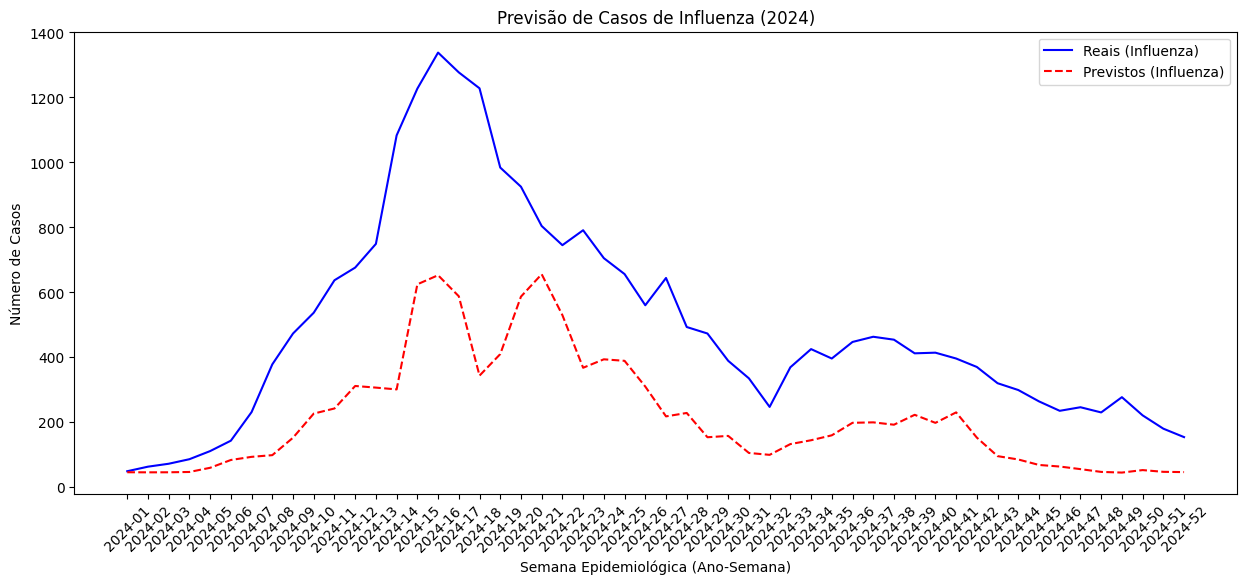

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(y_test.index, y_test['SRAG por influenza'], label='Reais (Influenza)', color='blue')
plt.plot(y_pred_df.index, y_pred_df['SRAG por influenza'], label='Previstos (Influenza)', color='red', linestyle='--')
plt.title('Previsão de Casos de Influenza (2024)')
plt.xlabel('Semana Epidemiológica (Ano-Semana)')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.legend()
plt.show()

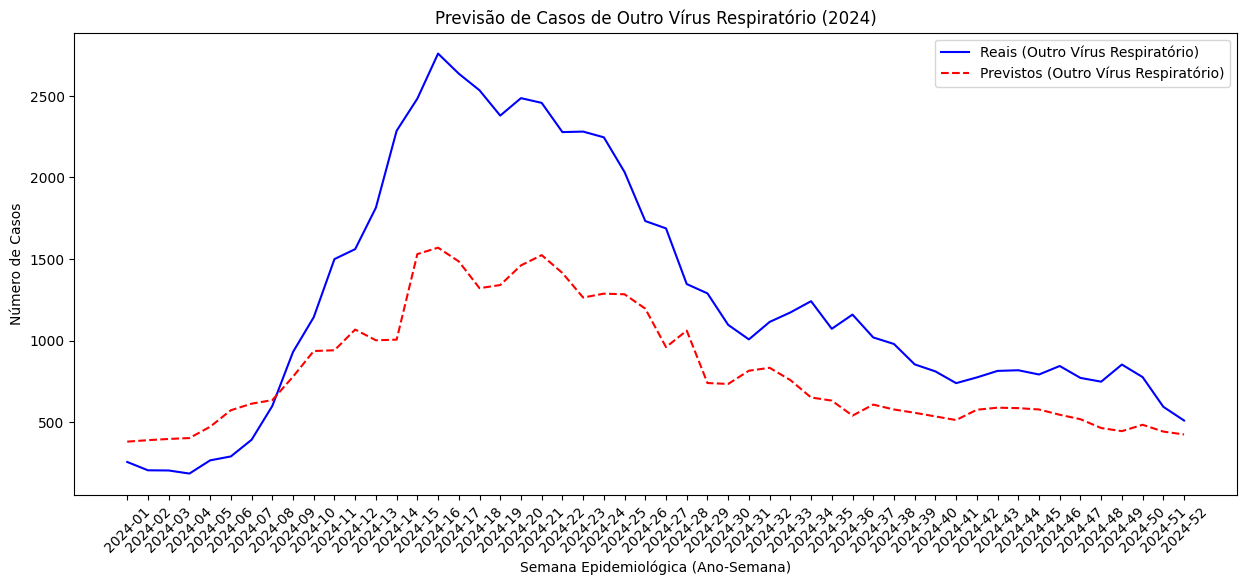

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(y_test.index, y_test['SRAG por outro vírus respiratório'], label='Reais (Outro Vírus Respiratório)', color='blue')
plt.plot(y_pred_df.index, y_pred_df['SRAG por outro vírus respiratório'],label='Previstos (Outro Vírus Respiratório)', color='red', linestyle='--')
plt.title('Previsão de Casos de Outro Vírus Respiratório (2024)')
plt.xlabel('Semana Epidemiológica (Ano-Semana)')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.legend()
plt.show()

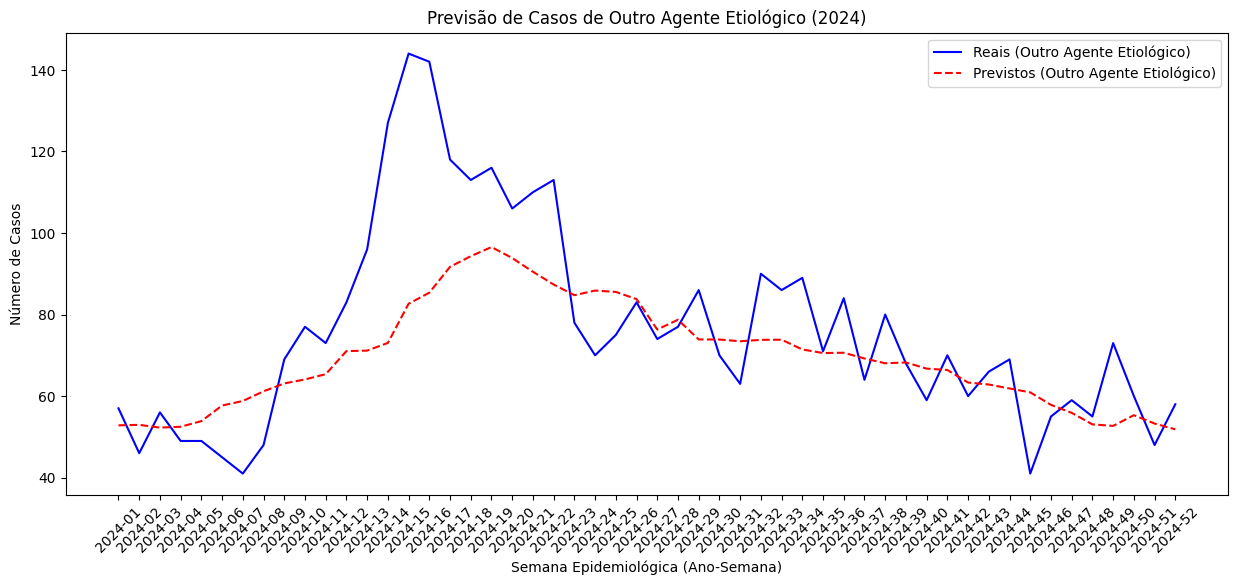

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(y_test.index, y_test['SRAG por outro agente etiológico'], label='Reais (Outro Agente Etiológico)', color='blue')
plt.plot(y_pred_df.index, y_pred_df['SRAG por outro agente etiológico'], label='Previstos (Outro Agente Etiológico)', color='red', linestyle='--')
plt.title('Previsão de Casos de Outro Agente Etiológico (2024)')
plt.xlabel('Semana Epidemiológica (Ano-Semana)')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.legend()
plt.show()

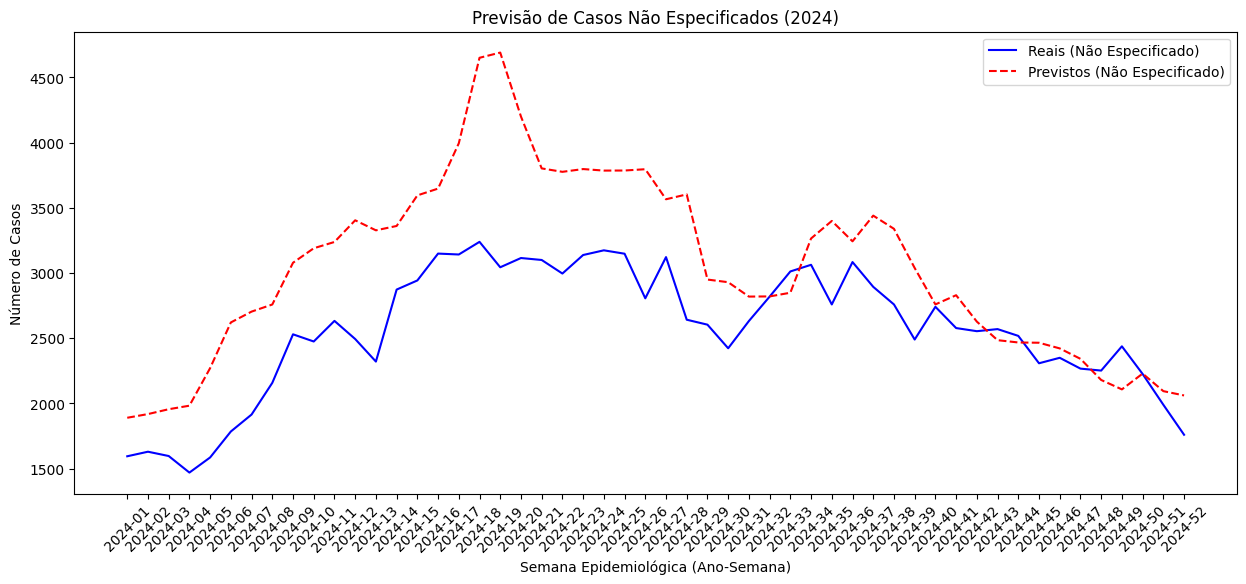

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(y_test.index, y_test['SRAG não especificado'], label='Reais (Não Especificado)', color='blue')
plt.plot(y_pred_df.index, y_pred_df['SRAG não especificado'], label='Previstos (Não Especificado)', color='red', linestyle='--')
plt.title('Previsão de Casos Não Especificados (2024)')
plt.xlabel('Semana Epidemiológica (Ano-Semana)')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.legend()
plt.show()

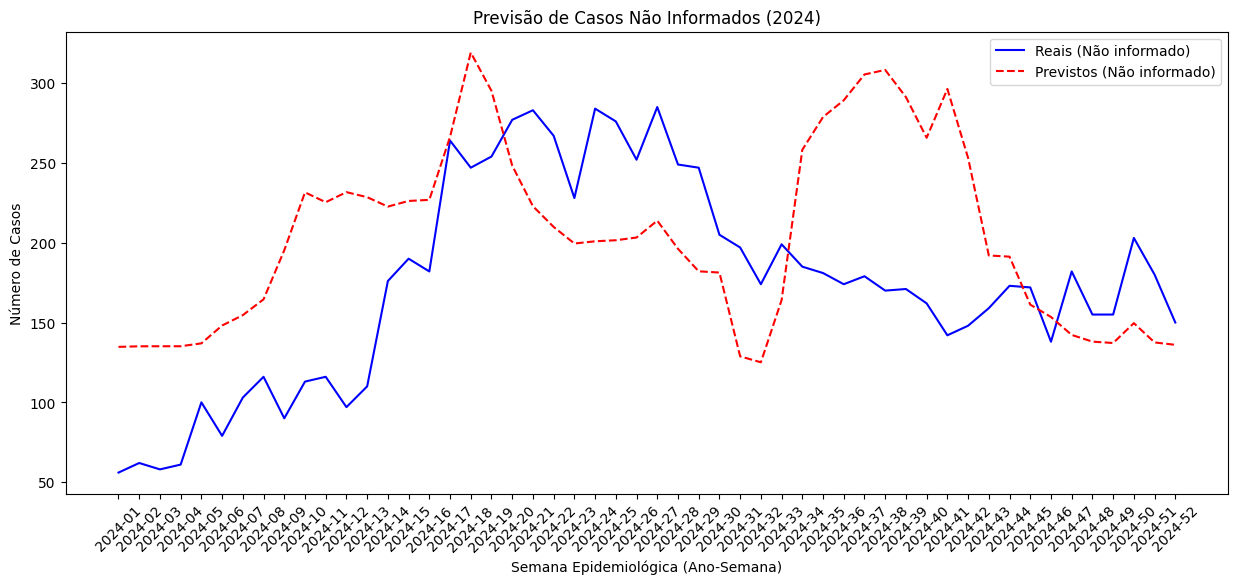

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(y_test.index, y_test['Não informado'], label='Reais (Não informado)', color='blue')
plt.plot(y_pred_df.index, y_pred_df['Não informado'], label='Previstos (Não informado)', color='red', linestyle='--')
plt.title('Previsão de Casos Não Informados (2024)')
plt.xlabel('Semana Epidemiológica (Ano-Semana)')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Fazendo a previsão do número de casos para 2025

### Retreinando o modelo, agora utilizando todos os dados disponíveis

In [122]:
features_cols_final = ['lag_1', 'lag_2', 'lag_3', 'media_movel_4s','semana_do_ano']
target_cols_final = ['SRAG por influenza', 'SRAG por outro vírus respiratório', 'SRAG por outro agente etiológico', 'SRAG não especificado', 'SRAG por covid-19']

X_full = df_modelo[features_cols_final]
y_full = df_modelo[target_cols_final]

# Treinando o modelo com todos os dados disponíveis
parameters = {'n_estimators': [50,100,150,200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
model = RandomForestRegressor(random_state=random_state)

grid_search_final = GridSearchCV(model, parameters,cv=5, scoring='neg_mean_squared_error', n_jobs=1)
grid_search_final.fit(X_full, y_full)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


### Utilizaremos a última semana de 2024 como ponto de partida para a previsão

In [123]:
ultima_semana_2024 = X_full.tail(1)
ultima_semana_2024

CLASSI_FIN_TRATADA,lag_1,lag_2,lag_3,media_movel_4s,semana_do_ano
SEM_PRI_ANO,,,,,
2024-52,3678.0,4112.0,4431.0,4063.0,52


### Desenvolvendo o processo de previsão iterativa para 2025

In [124]:
future_predictions = []

n_weeks = 52 # Prever para as próximas 52 semanas
current_features = ultima_semana_2024.copy()

for i in range(n_weeks):
    # Prevendo a próxima semana
    predicted_values = grid_search_final.predict(current_features)
    future_predictions.append(predicted_values[0])
    
    # Atualizando os lags
    current_total_cases = np.sum(predicted_values[0])
    lag_4_temp = current_features['lag_3']
    current_features['lag_3'] = current_features['lag_2']
    current_features['lag_2'] = current_features['lag_1']
    current_features['lag_1'] = current_total_cases
    
    # Atualizando a media movel 4s
    current_features['media_movel_4s'] = np.mean([current_features['lag_1'],current_features['lag_2'],current_features['lag_3'],lag_4_temp])
    # print(current_features['media_movel_4s'])
    
    # Atualizando a semana do ano
    current_features['semana_do_ano'] = (current_features['semana_do_ano'].values[0] % 52) + 1
    
    
print(f"\n{len(future_predictions)} semanas de 2025 foram previstas.")   


52 semanas de 2025 foram previstas.


Número de semanas a serem previstas: 52
Número de semanas conhecidas: 204


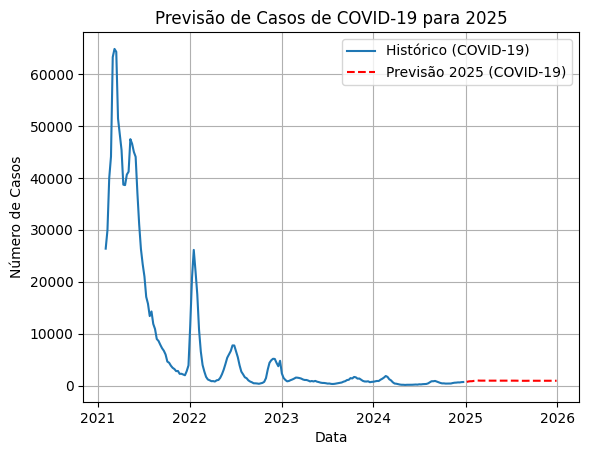

In [126]:
# Cria um indice de datas para 2025
future_dates = pd.date_range(start='2025-01-01', periods = n_weeks, freq='W-Mon')
print(f"Número de semanas a serem previstas: {len(future_dates)}")

df_previsao_2025 = pd.DataFrame(future_predictions, index=future_dates, columns=target_cols_final)

# Converte o indice do df_modelo de string (ano-semana) para uma data (ano-semana-01)
historico_dates = pd.to_datetime(df_modelo.index + '-1', format='%Y-%W-%w')
print(f"Número de semanas conhecidas: {len(historico_dates)}")

# Histórico de COVID-19
plt.plot(historico_dates, df_modelo['SRAG por covid-19'], label='Histórico (COVID-19)')

# Previsão de COVID-19 para 2025
plt.plot(df_previsao_2025.index, df_previsao_2025['SRAG por covid-19'], label='Previsão 2025 (COVID-19)', linestyle='--', color='red')

plt.title('Previsão de Casos de COVID-19 para 2025')
plt.xlabel('Data')
plt.ylabel('Número de Casos')
plt.legend()
plt.grid(True)
plt.show()

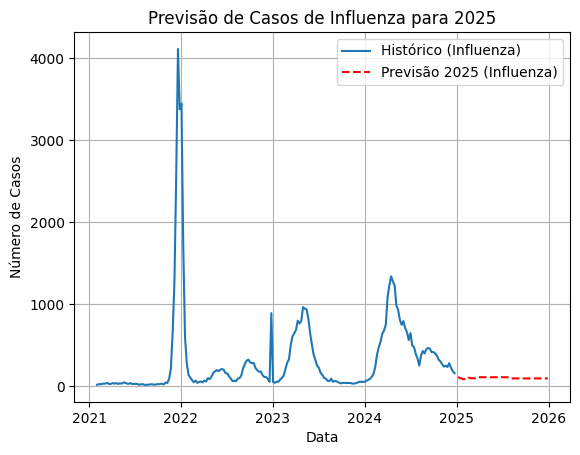

In [127]:
plt.plot(historico_dates, df_modelo['SRAG por influenza'], label='Histórico (Influenza)')
plt.plot(df_previsao_2025.index, df_previsao_2025['SRAG por influenza'], label='Previsão 2025 (Influenza)', linestyle='--', color='red')
plt.title('Previsão de Casos de Influenza para 2025')
plt.xlabel('Data')
plt.ylabel('Número de Casos')                  
plt.legend()
plt.grid(True)
plt.show()

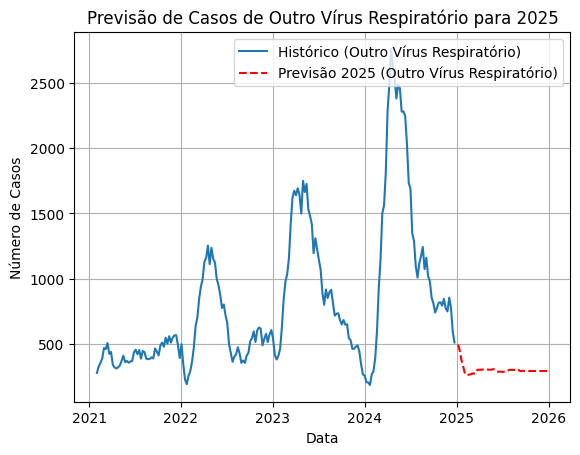

In [116]:
plt.plot(historico_dates, df_modelo['SRAG por outro vírus respiratório'], label='Histórico (Outro Vírus Respiratório)')
plt.plot(df_previsao_2025.index, df_previsao_2025['SRAG por outro vírus respiratório'], label='Previsão 2025 (Outro Vírus Respiratório)', linestyle='--', color='red')
plt.title('Previsão de Casos de Outro Vírus Respiratório para 2025')
plt.xlabel('Data')
plt.ylabel('Número de Casos')
plt.legend()
plt.grid(True)
plt.show()

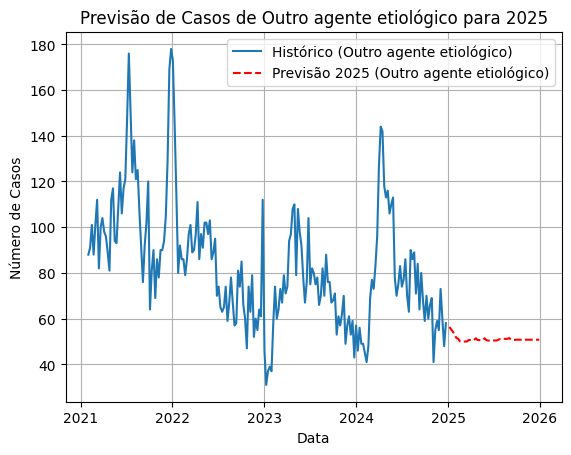

In [118]:
plt.plot(historico_dates, df_modelo['SRAG por outro agente etiológico'], label='Histórico (Outro agente etiológico)')
plt.plot(df_previsao_2025.index, df_previsao_2025['SRAG por outro agente etiológico'], label='Previsão 2025 (Outro agente etiológico)', linestyle='--', color='red')
plt.title('Previsão de Casos de Outro agente etiológico para 2025')
plt.xlabel('Data')
plt.ylabel('Número de Casos')
plt.legend()
plt.grid(True)
plt.show()

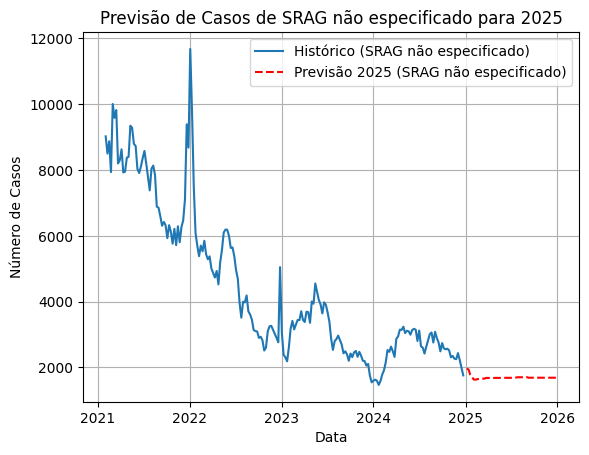

In [119]:
# SRAG não especificado
plt.plot(historico_dates, df_modelo['SRAG não especificado'], label='Histórico (SRAG não especificado)')
plt.plot(df_previsao_2025.index, df_previsao_2025['SRAG não especificado'], label='Previsão 2025 (SRAG não especificado)', linestyle='--', color='red')
plt.title('Previsão de Casos de SRAG não especificado para 2025')
plt.xlabel('Data')
plt.ylabel('Número de Casos')
plt.legend()
plt.grid(True)
plt.show()

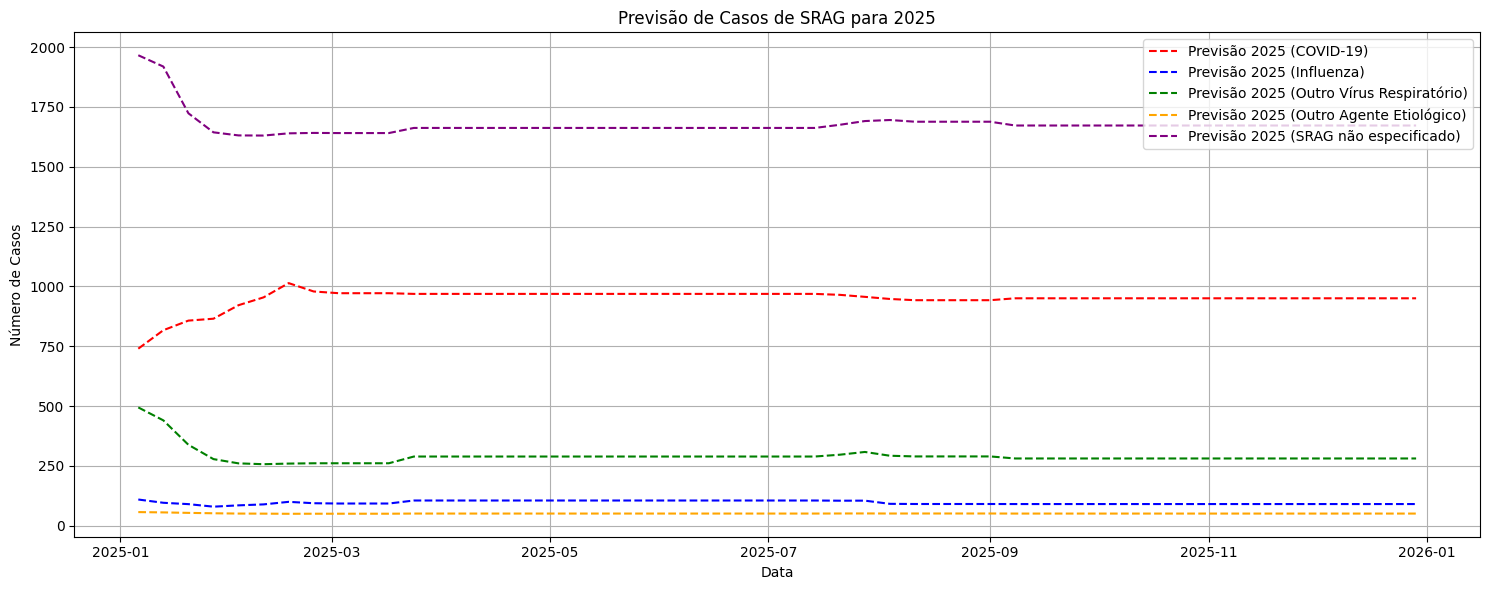

In [130]:
plt.figure(figsize=(15, 6))
plt.plot(future_dates, df_previsao_2025['SRAG por covid-19'], label='Previsão 2025 (COVID-19)', color='red', linestyle='--')
plt.plot(future_dates, df_previsao_2025['SRAG por influenza'], label='Previsão 2025 (Influenza)', color='blue', linestyle='--')
plt.plot(future_dates, df_previsao_2025['SRAG por outro vírus respiratório'], label='Previsão 2025 (Outro Vírus Respiratório)', color='green', linestyle='--')
plt.plot(future_dates, df_previsao_2025['SRAG por outro agente etiológico'], label='Previsão 2025 (Outro Agente Etiológico)', color='orange', linestyle='--')
plt.plot(future_dates, df_previsao_2025['SRAG não especificado'], label='Previsão 2025 (SRAG não especificado)', color='purple', linestyle='--')

plt.title('Previsão de Casos de SRAG para 2025')
plt.xlabel('Data')
plt.ylabel('Número de Casos')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()